In [1]:
# Parameters
global_seed = 88
save_results = True
benchmark_settings = {"benchmark_name": "pMNIST_via_avalanche", "difficulty": "standard", "num_tasks": 4, "train_percentage": 0.2, "num_val_benchmarks": 2, "batch_size": 128}
method_settings = {"method_name": "EWC", "grow_from": "output", "hessian_percentile": 95, "grad_percentile": 95, "num_inputs": 784, "num_hidden_root": 200, "num_outputs": 10, "loss_name": "CE", "optimizer_name": "Adam"}
HPO_settings = {"HPO_name": "greedy_HPO", "n_trials": 1, "num_epochs": [2, 6], "ewc_lambda": [200, 1000]}


In [2]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

global_seed = 88
save_results = True
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.2,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 200,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (2,2),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(1)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-26 17:56:36,763] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 17:56:36 +0200
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:21,  4.25it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:21,  4.25it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:21,  4.25it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:21,  4.25it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:21,  4.25it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:20,  4.25it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:20,  4.25it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:20,  4.25it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:20,  4.25it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 31.36it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 31.36it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:02, 31.36it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:02, 31.36it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:02, 31.36it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:02, 31.36it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:02, 31.36it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:02, 31.36it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:02, 31.36it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 46.80it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 46.80it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 46.80it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 46.80it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 46.80it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 46.80it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 46.80it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 46.80it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 46.80it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 56.54it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 56.54it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 56.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 56.54it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 56.54it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 56.54it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 56.54it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 56.54it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:01, 56.54it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 63.01it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 63.01it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.01it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.01it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.01it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.01it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.01it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.01it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.01it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.14it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.14it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.14it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.14it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.14it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.14it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.14it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.14it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.14it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.12it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.12it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.12it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.12it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.12it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.12it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.12it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.12it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.12it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 71.93it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 71.93it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 71.93it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:01<00:00, 71.93it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:01<00:00, 71.93it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:01<00:00, 71.93it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:01<00:00, 71.93it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 71.93it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 71.93it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 73.20it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 73.20it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 73.20it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 73.20it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 73.20it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 73.20it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 73.20it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 73.20it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.20it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.90it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.90it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.90it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.90it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.90it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.90it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.90it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.90it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.90it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.66it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.66it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.66it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.66it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.66it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.66it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.66it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.66it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.66it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.37it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.37it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.37it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.37it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.37it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.37it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 73.37it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.66it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7052
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7894


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.63it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.61it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.88it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.92it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.45it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.21it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.21it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.21it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.21it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.21it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.21it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.21it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.21it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.21it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.15it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.15it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.15it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.15it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.15it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.15it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.15it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.15it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.15it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.58it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.58it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 68.58it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 68.58it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 68.58it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 68.58it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.58it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.58it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.58it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.19it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.19it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.19it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.19it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.19it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.19it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.19it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.19it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.19it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.14it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.14it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.14it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.14it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.14it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.14it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.14it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.14it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.14it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.95it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.95it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.95it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 71.95it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 71.95it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 71.95it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 71.95it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 71.95it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 71.95it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.47it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.47it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 73.47it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 73.47it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 73.47it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 73.47it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 73.47it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 73.47it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 73.47it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 74.49it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 74.49it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 74.49it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 74.49it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 74.49it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 74.49it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 74.49it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 74.49it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 74.49it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 74.97it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 74.97it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 74.97it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 74.97it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 74.97it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 74.97it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 74.97it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 74.97it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 74.97it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 75.31it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 75.31it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 75.31it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 75.31it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 75.31it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 75.31it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 75.31it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 75.31it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 75.31it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 75.53it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 75.53it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 75.53it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 75.53it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 75.53it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 75.53it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 75.53it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 75.53it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 75.53it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 75.85it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 75.85it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.95it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2082
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9382


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:04, 23.21it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.14it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.59it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.55it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.03it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.64it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.64it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 53.64it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 53.64it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 53.64it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 53.64it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 53.64it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 53.64it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 53.64it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 64.90it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 64.90it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 64.90it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 64.90it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 64.90it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 64.90it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 64.90it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.90it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.90it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.06it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.06it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.06it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.06it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.06it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.06it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.06it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.06it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.06it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 72.00it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 72.00it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 72.00it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 72.00it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 72.00it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 72.00it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 72.00it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 72.00it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 72.00it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.67it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.67it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 73.67it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 73.67it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 73.67it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 73.67it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 73.67it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 73.67it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 73.67it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.72it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.72it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 74.72it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 74.72it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 74.72it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 74.72it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 74.72it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 74.72it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 74.72it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.16it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.16it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 75.16it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 75.16it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 75.16it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 75.16it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 75.16it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 75.16it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 75.16it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.67it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.67it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 75.67it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 75.67it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 75.67it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 75.67it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 75.67it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 75.67it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 75.67it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.01it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.01it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 76.01it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 76.01it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 76.01it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 76.01it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 76.01it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 76.01it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 76.01it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.26it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.26it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 76.26it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 76.26it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 76.26it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 76.26it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 76.26it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 76.26it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 76.26it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.40it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.40it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 76.40it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 76.40it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 76.40it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 76.40it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 76.40it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 76.40it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 76.40it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.82it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.82it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.15it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1352
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9613


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.45it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.93it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 43.67it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 48.94it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 52.78it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.67it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.67it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.67it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.67it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.67it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.67it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.67it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.67it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 55.67it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.88it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.88it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.88it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.88it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.88it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.88it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.88it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.88it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.88it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 71.63it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 71.63it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 71.63it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 71.63it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 71.63it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 71.63it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 71.63it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 71.63it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 71.63it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 73.64it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 73.64it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 73.64it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 73.64it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 73.64it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 73.64it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 73.64it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 73.64it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 73.64it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 74.52it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 74.52it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 74.52it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 74.52it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 74.52it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 74.52it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 74.52it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 74.52it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 74.52it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 75.28it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 75.28it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 75.28it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 75.28it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 75.28it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 75.28it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 75.28it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 75.28it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 75.28it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.77it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.77it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 75.77it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 75.77it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 75.77it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 75.77it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 75.77it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 75.77it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 75.77it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.85it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.85it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 75.85it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 75.85it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 75.85it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 75.85it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 75.85it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 75.85it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 75.85it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 75.92it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 75.92it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 75.92it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 75.92it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 75.92it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:00<00:00, 75.92it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 75.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 75.92it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 75.92it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.17it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.17it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 76.17it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 76.17it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 76.17it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 76.17it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 76.17it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 76.17it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 76.17it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.14it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.14it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 76.14it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 76.14it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 76.14it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 76.14it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 76.14it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 76.14it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 76.14it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.62it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.62it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.70it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1004
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9707


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.50it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.97it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 43.69it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 48.96it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 52.80it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.70it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.70it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.70it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.70it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.70it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.70it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.70it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.70it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 55.70it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.91it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.91it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.91it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.91it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.91it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.91it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.91it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.91it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.91it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 71.93it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 71.93it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 71.93it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 71.93it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 71.93it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 71.93it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 71.93it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 71.93it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 71.93it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 73.55it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 73.55it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 73.55it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 73.55it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 73.55it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 73.55it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 73.55it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 73.55it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 73.55it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 74.46it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 74.46it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 74.46it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 74.46it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 74.46it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 74.46it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 74.46it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 74.46it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 74.46it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.99it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.99it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 74.99it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 74.99it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 74.99it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 74.99it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 74.99it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 74.99it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 74.99it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 74.00it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 74.00it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 74.00it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 74.00it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 74.00it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 74.00it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 74.00it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 74.00it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 74.00it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 74.84it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 74.84it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 74.84it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 74.84it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 74.84it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 74.84it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 74.84it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 74.84it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 74.84it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 75.43it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 75.43it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 75.43it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 75.43it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 75.43it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 75.43it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 75.43it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 75.43it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 75.43it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 75.83it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 75.83it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 75.83it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 75.83it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 75.83it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 75.83it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 75.83it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 75.83it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 75.83it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 75.90it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 75.90it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 75.90it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 75.90it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 75.90it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 75.90it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 75.90it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 75.90it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 75.90it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.45it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.45it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.34it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0774
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9782


-- >> End of training phase << --


[I 2024-07-26 17:56:47,669] Trial 0 finished with value: 94.51655999999996 and parameters: {'num_epochs': 5, 'ewc_lambda': 606}. Best is trial 0 with value: 94.51655999999996.


-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:17,  5.46it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:17,  5.46it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:16,  5.46it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:16,  5.46it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:16,  5.46it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:16,  5.46it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:16,  5.46it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:15,  5.46it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:15,  5.46it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 36.56it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 36.56it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:02, 36.56it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:02, 36.56it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:02, 36.56it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:02, 36.56it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:02, 36.56it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:02, 36.56it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:02, 36.56it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 51.23it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 51.23it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 51.23it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 51.23it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 51.23it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 51.23it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 51.23it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 51.23it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 51.23it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 59.38it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 59.38it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 59.38it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 59.38it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 59.38it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 59.38it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 59.38it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 59.38it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:01, 59.38it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.22it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.22it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 64.22it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 64.22it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 64.22it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 64.22it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 64.22it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 64.22it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 64.22it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.31it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.31it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.31it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.31it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.31it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.31it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.31it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.31it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.31it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.39it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.39it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 69.39it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 69.39it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 69.39it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 69.39it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.39it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.39it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.39it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.74it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.74it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.74it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.74it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.74it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.74it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:01<00:00, 70.74it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 70.74it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 70.74it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 71.71it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 71.71it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 71.71it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 71.71it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 71.71it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 71.71it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 71.71it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.71it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.71it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.41it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.41it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.41it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.41it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.41it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.41it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.41it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.41it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.41it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.88it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.88it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.88it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.88it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.88it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.88it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.88it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.88it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.88it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.22it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.22it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.22it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.22it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.22it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 73.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.17it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7214
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7814


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.26it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.34it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.81it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.85it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.51it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.22it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.22it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.22it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.22it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.22it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.22it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.22it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.22it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.22it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.57it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.57it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.57it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.57it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.57it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.57it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.57it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.57it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.57it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.36it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.36it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.36it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.36it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.36it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.36it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.36it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.36it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.36it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.14it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.14it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.14it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.14it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.14it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.14it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.14it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.14it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.14it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.06it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.06it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.06it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.06it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.06it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.06it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.06it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.06it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.06it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.64it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.64it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.64it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.64it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.64it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.64it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.64it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.64it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.64it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 73.01it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 73.01it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 73.01it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 73.01it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 73.01it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 73.01it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 73.01it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.20it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.20it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.20it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.20it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.20it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.20it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.20it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.20it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.20it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.42it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.42it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.42it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.42it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.42it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.42it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.42it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.42it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.42it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.53it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.53it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.53it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.53it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.53it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.53it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.53it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.53it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.53it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.59it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.59it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.59it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.59it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.59it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.59it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.59it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.59it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.16it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.16it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.21it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2067
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9403


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:04, 22.50it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 34.47it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 41.96it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.04it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 50.78it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.61it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.61it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 53.61it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 53.61it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 53.61it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 53.61it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 53.61it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 53.61it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 53.61it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.37it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.37it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.37it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.37it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.37it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.37it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.37it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.37it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.37it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.20it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.20it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.20it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.20it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.20it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.20it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.20it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.20it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.20it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.96it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.96it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.96it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.96it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.96it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.96it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.96it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.96it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.96it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.02it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.02it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.02it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.02it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.02it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.02it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.02it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.02it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.02it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.66it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.66it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.66it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.66it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.66it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.66it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.66it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.66it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.66it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 73.01it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 73.01it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 73.01it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 73.01it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 73.01it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 73.01it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 73.01it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.27it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.27it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.27it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.27it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.27it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.27it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.27it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.27it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.27it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.44it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.44it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.44it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.44it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.44it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.44it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.44it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.44it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.44it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.54it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.54it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.54it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.54it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.54it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.54it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.54it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.54it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.54it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.62it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.62it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.62it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.62it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.62it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.62it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.62it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.62it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.62it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.15it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.15it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.16it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1301
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9639


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:04, 23.21it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.33it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.80it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.86it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.49it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.29it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.29it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.29it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.29it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.29it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.29it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.29it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.29it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.29it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.65it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.65it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.65it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.65it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.65it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.65it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.65it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.65it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.65it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.43it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.43it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.43it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.43it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.43it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.43it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.43it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.43it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.43it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.21it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.21it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.21it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.21it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.21it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.21it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.21it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.21it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.21it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.17it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.17it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.17it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.17it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.17it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.17it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.17it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.17it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.17it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.80it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.80it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.80it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.80it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.80it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.80it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.80it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.80it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.80it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.12it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.12it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 73.12it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 73.12it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 73.12it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 73.12it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 73.12it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 73.12it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 73.12it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.25it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.25it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.25it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.25it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.25it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.25it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.25it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.25it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.25it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.41it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.41it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.41it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.41it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.41it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.41it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.41it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.41it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.41it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.54it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.54it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.54it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.54it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.54it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.54it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.54it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.54it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.54it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.61it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.61it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.61it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.61it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.61it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.61it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.61it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.61it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.61it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.13it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.13it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.25it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0978
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9716


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.39it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.50it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.92it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.93it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.27it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.27it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.27it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.27it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.27it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.27it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.27it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.27it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.27it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.53it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.53it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.53it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.53it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.53it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.53it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.53it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.53it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.53it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.22it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.22it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.22it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.22it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.22it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.22it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.22it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.22it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.22it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.00it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.00it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.00it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.00it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.00it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.00it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.00it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.00it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.00it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.10it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.10it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 73.10it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 73.10it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 73.10it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 73.10it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 73.10it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 73.10it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 73.10it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.53it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.53it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 74.53it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 74.53it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 74.53it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 74.53it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 74.53it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 74.53it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 74.53it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.42it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.42it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 75.42it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 75.42it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 75.42it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 75.42it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 75.42it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 75.42it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 75.42it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 76.07it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 76.07it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 76.07it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 76.07it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 76.07it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 76.07it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 76.07it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 76.07it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 76.07it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.49it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.49it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 76.49it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 76.49it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 76.49it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 76.49it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 76.49it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 76.49it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 76.49it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.78it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.78it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 76.78it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 76.78it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 76.78it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 76.78it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 76.78it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 76.78it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 76.78it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.02it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.02it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 77.02it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 77.02it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 77.02it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 77.02it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 77.02it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 77.02it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 77.02it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.70it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.70it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.50it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0774
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9780


-- >> End of training phase << --


[I 2024-07-26 17:56:57,976] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 17:56:57 +0200
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 29.20it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 41.03it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 47.69it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.00it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.98it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.15it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.15it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.15it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.15it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.15it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.15it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.15it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.15it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 57.15it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.24it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.24it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 66.24it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 66.24it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 66.24it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 66.24it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 66.24it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.24it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.24it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.10it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.10it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.10it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.10it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.10it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.10it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.10it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.10it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.10it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.42it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.42it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.42it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.42it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.42it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.42it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.42it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.42it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.42it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.13it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.13it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.13it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.13it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.13it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.13it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.13it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.13it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.13it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.66it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.66it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.66it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 71.66it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 71.66it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 71.66it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 71.66it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 71.66it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 71.66it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.98it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.98it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 71.98it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 71.98it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 71.98it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 71.98it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 71.98it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 71.98it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 71.98it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.19it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.19it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.19it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.19it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.19it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.19it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.19it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.19it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.19it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.12it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.12it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 72.12it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.12it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.12it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.12it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.12it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.12it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.12it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.51it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.51it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.51it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.51it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.51it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.51it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.51it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.51it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.51it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.05it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.05it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.05it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.05it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.05it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.05it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.05it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.05it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.05it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.76it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.76it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.86it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7938
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8088


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.80it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.86it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 54.00it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.82it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.29it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.06it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.41it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.41it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.41it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.41it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.41it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.41it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.41it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.41it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.41it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.77it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.77it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.77it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.77it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.77it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.77it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.77it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.77it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.77it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.52it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.52it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.52it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.52it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.52it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.52it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.52it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.52it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.52it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.24it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.24it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.24it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.24it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.24it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.24it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.24it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.24it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.24it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.70it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.70it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.70it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.70it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.70it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.70it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.70it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.70it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.70it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.98it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.98it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 71.98it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 71.98it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 71.98it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 71.98it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 71.98it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 71.98it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.98it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.12it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.12it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.12it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.12it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.12it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.12it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.12it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.12it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.12it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.29it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.29it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.29it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.29it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.29it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.29it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.29it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.29it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.29it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.34it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.34it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.34it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.34it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.34it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.34it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.34it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.34it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.34it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.42it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.42it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.42it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.42it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.42it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.42it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.42it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.42it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.42it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.42it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.42it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.42it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.42it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.42it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.42it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.42it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.84it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2720
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9378


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.66it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.84it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.99it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.72it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.23it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.05it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.38it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.38it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.38it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.38it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.38it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.38it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.38it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.38it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.38it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.89it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.89it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.89it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.89it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.89it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.89it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.89it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.89it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.89it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.59it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.59it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.59it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.59it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.59it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.59it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.59it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.59it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.59it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.41it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.41it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.41it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.41it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.41it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.41it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.41it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.41it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.41it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.82it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.82it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.82it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.82it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.82it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.82it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.82it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.82it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.82it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.12it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.12it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.12it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.12it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.12it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.12it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.12it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.12it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.12it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.26it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.26it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.26it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.26it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.26it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.26it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.26it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.26it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.26it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.43it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.43it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.43it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.43it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.43it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.43it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.43it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.43it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.43it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.54it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.54it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.54it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.54it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.59it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.59it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.59it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.59it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.59it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.59it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.59it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.59it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.59it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.59it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.59it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.59it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.59it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.59it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.59it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.59it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.00it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2055
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9586


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.02it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 48.15it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 54.20it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.90it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.40it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.27it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.60it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.60it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.60it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.60it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.60it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.60it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.60it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.60it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.60it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.01it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.01it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 69.01it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 69.01it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 69.01it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 69.01it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 69.01it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 69.01it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.01it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.77it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.77it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.77it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.77it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.77it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.77it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.77it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.77it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.77it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.15it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.15it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.15it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.15it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.15it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.15it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.15it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.15it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.15it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.58it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.58it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.58it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.58it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.58it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.58it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.58it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.58it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.58it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.23it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 71.23it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 71.23it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 71.23it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 71.23it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 71.23it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 71.23it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 71.23it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.23it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 71.64it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 71.64it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 71.64it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 71.64it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 71.64it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 71.64it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 71.64it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 71.64it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 71.64it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.95it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.95it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 71.95it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 71.95it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 71.95it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 71.95it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 71.95it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 71.95it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.95it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 71.55it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 71.55it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.55it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.55it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.55it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.55it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.55it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.55it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.55it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 70.99it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 70.99it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 70.99it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 70.99it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 70.99it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 70.99it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 70.99it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 70.99it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 70.99it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 70.93it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 70.93it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 70.93it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 70.93it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 70.93it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 70.93it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 70.93it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 70.93it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.93it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.17it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1690
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9692


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.22it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.42it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.65it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.38it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.85it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 61.62it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.99it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.99it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 62.99it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 62.99it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 62.99it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 62.99it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 62.99it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.99it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.99it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.55it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.55it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.55it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.55it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.55it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.55it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.55it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.55it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.55it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.40it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.40it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.40it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.40it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.40it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.40it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.40it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.40it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.40it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.41it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.41it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.41it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.41it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.41it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.41it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.41it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.41it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.41it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.27it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.27it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.27it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.27it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.27it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.27it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.27it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.27it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.27it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.13it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.13it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.13it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.13it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.13it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.13it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.13it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.13it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.13it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.03it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.03it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.03it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.03it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.03it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.03it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.03it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.03it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.03it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.87it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.87it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 69.87it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 69.87it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 69.87it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 69.87it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.87it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 69.87it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.81it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.81it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 69.81it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 69.81it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 69.81it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 69.81it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.81it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.81it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.81it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 70.73it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 70.73it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 70.73it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 70.73it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 70.73it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 70.73it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 70.73it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 70.73it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 70.73it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.21it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.21it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.21it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.21it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.21it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.21it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.21it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.21it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.21it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.04it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.04it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.49it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1428
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9755


-- >> End of training phase << --


[I 2024-07-26 17:57:12,153] Trial 0 finished with value: 92.18916000000002 and parameters: {'num_epochs': 5, 'ewc_lambda': 606}. Best is trial 0 with value: 92.18916000000002.


-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 37.21it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 48.26it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.61it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.74it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.84it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 60.35it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.55it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.55it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 61.55it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 61.55it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 61.55it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 61.55it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 61.55it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 61.55it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 61.55it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.18it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.18it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.18it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.18it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.18it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.18it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.18it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.18it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.18it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.57it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.57it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.57it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.57it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.57it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.57it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.57it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.57it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.57it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.64it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.64it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.64it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.64it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.64it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.64it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.64it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.64it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.64it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.20it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.20it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.20it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.20it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.20it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.20it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.20it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.20it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.20it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.96it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.96it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.96it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.96it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.96it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.96it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.96it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.96it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.96it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.56it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.56it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.56it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.56it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.56it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.56it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.56it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.56it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.56it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 70.28it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 70.28it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 70.28it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 70.28it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 70.28it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 70.28it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 70.28it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 70.28it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 70.28it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 70.14it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 70.14it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 70.14it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 70.14it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 70.14it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 70.14it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 70.14it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 70.14it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 70.14it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 70.03it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 70.03it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 70.03it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 70.03it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 70.03it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 70.03it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 70.03it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 70.03it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 70.03it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 70.02it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 70.02it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 70.02it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 70.02it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 70.02it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 70.02it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 70.02it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 70.02it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.02it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.00it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8289
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8049


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.98it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.51it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.26it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 55.78it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.17it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.82it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.82it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.82it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.82it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.82it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.82it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.82it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.82it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.58it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.58it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.58it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.58it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.58it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.58it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.58it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.58it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.38it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.38it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.38it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.38it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 67.38it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 67.38it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 67.38it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 67.38it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.08it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.08it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 67.08it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 67.08it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 67.08it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 67.08it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 67.08it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 67.08it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.91it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.91it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 66.91it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 66.91it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 66.91it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 66.91it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 66.91it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 66.91it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.83it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.83it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.83it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.83it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.83it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.83it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.83it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.83it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.89it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.89it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.89it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.89it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.89it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.89it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.89it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.89it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.31it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.31it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.31it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 67.31it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 67.31it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 67.31it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 67.31it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 67.31it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 67.64it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 67.64it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 67.64it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 67.64it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 67.64it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 67.64it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 67.64it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 67.64it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 67.92it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 67.92it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 67.92it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 67.92it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 67.92it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 67.92it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 67.92it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 67.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.11it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.11it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 68.11it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 68.11it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 68.11it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 68.11it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 68.11it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 68.11it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.32it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.32it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 68.32it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 68.32it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 68.32it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 68.32it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 68.32it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 68.32it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.39it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.39it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 68.39it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 68.39it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 68.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.59it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2964
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9333


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.90it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.40it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.15it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 55.52it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 57.85it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.51it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.51it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.51it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.51it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.51it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.51it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.51it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.51it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.23it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.23it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.23it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.23it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.23it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.23it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.23it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.23it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.92it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.92it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.92it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 66.92it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 66.92it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 66.92it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 66.92it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 66.92it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.78it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.78it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 67.78it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 67.78it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 67.78it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 67.78it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 67.78it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 67.78it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.28it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.28it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.28it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 68.28it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 68.28it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 68.28it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 68.28it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 68.28it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.52it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.52it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 68.52it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 68.52it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 68.52it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 68.52it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 68.52it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 68.52it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 68.69it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 68.69it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 68.69it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 68.69it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 68.69it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 68.69it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 68.69it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 68.69it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 68.83it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 68.83it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 68.83it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 68.83it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 68.83it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 68.83it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 68.83it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 68.83it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 68.87it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 68.87it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 68.87it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 68.87it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 68.87it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 68.87it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 68.87it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 68.87it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 68.90it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 68.90it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 68.90it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 68.90it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 68.90it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 68.90it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 68.90it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 68.90it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.93it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.93it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 68.93it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 68.93it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 68.93it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 68.93it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 68.93it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 68.93it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.97it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.97it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 68.97it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 68.97it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 68.97it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 68.97it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 68.97it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 68.97it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.97it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.97it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 68.97it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 68.97it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 68.97it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.97it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.44it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2174
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9566


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.65it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.15it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 51.91it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.33it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 57.03it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.08it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.08it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.08it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.08it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.08it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.08it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.08it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.08it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.08it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.65it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.65it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 66.65it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 66.65it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 66.65it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 66.65it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 66.65it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.65it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.65it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.83it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.83it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 68.83it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 68.83it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 68.83it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 68.83it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.83it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.83it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.83it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.80it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.80it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 69.80it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 69.80it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 69.80it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 69.80it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 69.80it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 69.80it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 69.80it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.10it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.10it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.10it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.10it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.10it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.10it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.10it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.10it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.10it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.48it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.48it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.48it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.48it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.48it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.48it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.48it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.48it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.48it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.80it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.80it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.80it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.80it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 69.80it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 69.80it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 69.80it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 69.80it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 69.64it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 69.64it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.64it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.64it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 69.64it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 69.64it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 69.64it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 69.64it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.54it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 69.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 69.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 69.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 69.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 69.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.43it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.43it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.43it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.43it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 69.43it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 69.43it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 69.43it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 69.43it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 69.42it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 69.42it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.42it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 69.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 69.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 69.42it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 69.42it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 69.42it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 69.50it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 69.50it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 69.50it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 69.50it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 69.50it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 69.50it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 69.50it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 69.37it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1750
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9682


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.77it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.41it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.27it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 55.77it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.13it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.78it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.78it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.78it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.78it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.78it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.78it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.78it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.78it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.78it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.35it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.35it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.35it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.35it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.35it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.35it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.35it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.35it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.35it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.69it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.69it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.69it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.69it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.69it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.69it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.69it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.69it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.69it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.35it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.35it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.35it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.35it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.35it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.35it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.35it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.35it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.35it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.18it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.18it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.18it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.18it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.18it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.18it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.18it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.18it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.18it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.22it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.22it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.22it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.22it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.22it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.22it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.22it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.22it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.22it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.90it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.90it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.90it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.90it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.90it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.90it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.90it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.90it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.90it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 71.40it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 71.40it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.40it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 71.40it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 71.40it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 71.40it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 71.40it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 71.40it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 71.40it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.05it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.05it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.05it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.05it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.05it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.05it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.05it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.05it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.05it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.45it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.45it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.45it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.45it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.45it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.45it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.45it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.45it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.45it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.27it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.27it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.27it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.27it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.27it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.27it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.27it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.27it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.27it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.30it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.30it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.50it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1532
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9741


-- >> End of training phase << --


[I 2024-07-26 17:57:22,648] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 17:57:22 +0200
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.25it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.90it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.82it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.60it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.57it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.90it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.90it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.90it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.90it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.90it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.90it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.90it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.90it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.21it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.21it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.21it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.21it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.21it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.21it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.21it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.21it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.79it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.79it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.79it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 66.79it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 66.79it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 66.79it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 66.79it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 66.79it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.73it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.73it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 67.73it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 67.73it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 67.73it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 67.73it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 67.73it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 67.73it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.89it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.89it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 67.89it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 67.89it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 67.89it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 67.89it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 67.89it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 67.89it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.49it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.49it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.49it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.49it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.49it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.49it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.49it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.49it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.24it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.24it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 67.24it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 67.24it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 67.24it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 67.24it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 67.24it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 67.24it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.05it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.05it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.05it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 67.05it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 67.05it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 67.05it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 67.05it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 67.05it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.98it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.98it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.98it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.98it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.98it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 66.98it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.98it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.98it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.89it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.89it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.89it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.89it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.89it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.89it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.89it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.89it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.82it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.82it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.82it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.82it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.82it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.82it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.82it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.82it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.66it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.66it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.66it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.66it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.66it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.66it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.66it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.66it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.49it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.49it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.49it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.49it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.49it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.49it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.82it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8224
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8381


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.59it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.47it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.84it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.00it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.08it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.62it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.62it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.62it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.62it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.62it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.62it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.62it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.62it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.81it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.81it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.81it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.81it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.81it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.81it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.81it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.81it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.54it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.54it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.54it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.54it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.54it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.54it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.54it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.28it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.28it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.28it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.28it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.28it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.28it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.28it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.28it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.65it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.65it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.65it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.65it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.65it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.65it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.65it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.65it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.83it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.83it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.83it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.83it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.83it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.83it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.83it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.83it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.07it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.07it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.07it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.07it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.07it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.07it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.07it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.07it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.17it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.17it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.17it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.17it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.17it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.17it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.17it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.17it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.30it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.30it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.30it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.30it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.30it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.30it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.30it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.30it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.38it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.38it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.38it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.38it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.38it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.38it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.38it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.38it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.43it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.43it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.43it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.43it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.43it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.43it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.43it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.43it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.46it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.46it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.46it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.46it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.46it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.46it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.46it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.46it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.48it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.48it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.48it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.48it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.48it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.48it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.90it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3863
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9340


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.67it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.58it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.97it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.18it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.78it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.78it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.78it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.78it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.78it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.78it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.78it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.78it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.91it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.91it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.91it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.91it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.91it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.91it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.91it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.91it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.69it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.69it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.69it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.69it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.69it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.69it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.69it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.69it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.47it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.47it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.47it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.47it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.47it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.47it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.47it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.47it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.97it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.97it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.97it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.97it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.97it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.97it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.97it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.97it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.19it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.19it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.19it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.19it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.19it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.19it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.19it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.19it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.29it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.29it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.29it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.29it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.29it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.29it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.29it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.29it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.39it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.39it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.39it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.39it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.39it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.39it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.39it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.39it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.49it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.49it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.49it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.49it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.49it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.49it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.49it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.49it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.55it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.55it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.55it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.55it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.55it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.55it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.55it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.55it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.61it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.61it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.61it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.61it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.61it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.61it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.61it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.61it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.68it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.68it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.68it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.68it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.68it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.68it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.68it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.68it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.57it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.57it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.57it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.57it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.57it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.57it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.08it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3072
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9549


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.34it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.29it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.77it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.94it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.00it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.49it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.49it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.49it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.49it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.49it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.49it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.49it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.49it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.88it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.88it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.88it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.88it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.88it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.88it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.88it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.88it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.66it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.66it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.66it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.66it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.66it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.66it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.66it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.66it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.50it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.50it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.50it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.50it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.50it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.50it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.50it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.50it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.95it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.95it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.95it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.95it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.95it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.95it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.95it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.95it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.20it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.20it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.20it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.20it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.20it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.20it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.20it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.20it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.37it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.37it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.37it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.37it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.37it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.37it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.37it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.37it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.48it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.48it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.48it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.48it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.48it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.48it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.48it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.48it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.52it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.52it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.52it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.52it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.52it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.52it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.52it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.52it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.54it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.57it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.57it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.57it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.57it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.57it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.57it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.60it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.60it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.60it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.60it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.60it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.60it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.60it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.60it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.63it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.63it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.63it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.63it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.63it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.63it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.10it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2749
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9617


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.43it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.48it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.89it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.09it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.21it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.72it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.72it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.72it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.72it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.72it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.72it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.72it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.72it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.00it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.00it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.00it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.00it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.00it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.00it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.00it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.00it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.74it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.74it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.74it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.74it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.74it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.74it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.74it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.74it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.05it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.05it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 66.05it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 66.05it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 66.05it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 66.05it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 66.05it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 66.05it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.73it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.73it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.73it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.73it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.73it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.73it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.73it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.73it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.75it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.75it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.75it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.75it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.75it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.75it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.75it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.75it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.78it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.78it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.78it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.78it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.78it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.78it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.78it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.78it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.81it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.81it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.81it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.81it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.81it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.81it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.81it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.81it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.86it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.86it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.86it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.86it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 65.86it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.86it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.86it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.86it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.14it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.14it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.14it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.14it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.14it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.14it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.14it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.14it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.70it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.70it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.70it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.70it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.70it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.70it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.70it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.70it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.66it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.66it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.66it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.66it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.66it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.66it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.66it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.66it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.48it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.48it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.48it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.48it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.48it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.48it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.89it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2546
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9672


-- >> End of training phase << --


[I 2024-07-26 17:57:40,640] Trial 0 finished with value: 91.67680888888884 and parameters: {'num_epochs': 5, 'ewc_lambda': 606}. Best is trial 0 with value: 91.67680888888884.


-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.17it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 43.71it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 48.20it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 50.85it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 52.86it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.26it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.26it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.26it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.26it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.26it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.26it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.26it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.26it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.79it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.79it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.79it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.79it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.79it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.79it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.79it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.79it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 63.12it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 63.12it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 63.12it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 63.12it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 63.12it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 63.12it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 63.12it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 63.12it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.16it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.16it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 64.16it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 64.16it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 64.16it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 64.16it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 64.16it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.16it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 64.77it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 64.77it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 64.77it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 64.77it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 64.77it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 64.77it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 64.77it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 64.77it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.19it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.19it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.19it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.19it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.19it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.19it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.19it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.19it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.45it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.45it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.45it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.45it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.45it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.45it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.45it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.45it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.62it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.62it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.62it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.62it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.62it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.62it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.62it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.62it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.71it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.71it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.71it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.71it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 65.71it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.71it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.71it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.71it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.79it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.79it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 65.79it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 65.79it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 65.79it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 65.79it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 65.79it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 65.79it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.77it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.77it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 65.77it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 65.77it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 65.77it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 65.77it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 65.77it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 65.77it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.82it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.82it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 65.82it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 65.82it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 65.82it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 65.82it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 65.82it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 65.82it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.90it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.90it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 65.90it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 65.90it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 65.90it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.90it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.13it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7884
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8450


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.62it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.55it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.98it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.26it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.41it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.95it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.95it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.95it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.95it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.95it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.95it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.95it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.95it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.19it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.19it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.19it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.19it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.19it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.19it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.19it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.19it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.77it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.77it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.77it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.77it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.77it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.77it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.77it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.77it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.61it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.61it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.61it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.61it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.61it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.61it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.61it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.61it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.03it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.03it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 66.03it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 66.03it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 66.03it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 66.03it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 66.03it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 66.03it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.36it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.36it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.36it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.36it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.36it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.36it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.36it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.36it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.55it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.55it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.55it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.55it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.55it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.55it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.55it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.55it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.55it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.55it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.55it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.55it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.55it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.55it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.55it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.55it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.62it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.62it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.62it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.62it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.62it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.62it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.62it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.62it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.68it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.68it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.68it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.68it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.68it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.68it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.68it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.68it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.71it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.71it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.71it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.71it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.71it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.71it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.71it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.71it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.72it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.72it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.72it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.72it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.72it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.72it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.72it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.72it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.71it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.71it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.71it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.71it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.71it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.71it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.22it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3733
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9381


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.57it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.56it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.95it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.20it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.40it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.92it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.92it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.92it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.92it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.92it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.92it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.92it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.92it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.15it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.15it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.15it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.15it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.15it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.15it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.15it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.15it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.85it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.85it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.85it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.85it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.85it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.85it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.85it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.85it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.65it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.65it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.65it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.65it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.65it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.65it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.65it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.65it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.08it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.08it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 66.08it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 66.08it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 66.08it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 66.08it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 66.08it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 66.08it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.30it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.30it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.30it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.30it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.30it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.30it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.30it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.30it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.47it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.47it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.47it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.47it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.47it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.47it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.47it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.47it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.60it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.60it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.60it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.60it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.60it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.60it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.60it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.60it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.65it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.65it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.65it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.65it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.65it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.65it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.65it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.71it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.71it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.71it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.71it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.71it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.71it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.71it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.71it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.73it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.73it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.73it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.73it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.73it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.73it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.73it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.73it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.74it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.74it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.74it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.74it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.74it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.74it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.74it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.74it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.74it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.74it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.74it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.25it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3069
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9532


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.51it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.46it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.87it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.13it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.84it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.84it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.84it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.84it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.84it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.84it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.84it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.84it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.13it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.13it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.13it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.13it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.13it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.13it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.13it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.13it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.74it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.74it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.74it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.74it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.74it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.74it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.74it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.74it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.56it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.56it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.56it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.56it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.56it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.56it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.56it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.56it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.04it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.04it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 66.04it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 66.04it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 66.04it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 66.04it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 66.04it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 66.04it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.31it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.31it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.31it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.31it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.31it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.31it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.31it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.31it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.46it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.46it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.46it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.46it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.46it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.46it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.46it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.46it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.59it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.59it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.59it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.59it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.59it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.59it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.59it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.59it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.65it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.65it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.65it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.65it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.65it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.65it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.65it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.72it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.72it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.72it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.72it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.72it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.72it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.72it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.72it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.70it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.70it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.70it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.70it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.70it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.70it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.70it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.70it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.74it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.74it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.74it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.74it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.74it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.74it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.74it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.75it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.75it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.75it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.75it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.75it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.75it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.23it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2723
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9623


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.48it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.55it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.89it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.14it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.33it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.86it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.86it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.86it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.86it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.86it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.86it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.86it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.86it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.08it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.08it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.08it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.08it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.08it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.08it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.08it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.08it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.80it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.80it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.80it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.80it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.80it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.80it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.80it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.80it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.61it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.61it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.61it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.61it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.61it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.61it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.61it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.61it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.09it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 66.09it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 66.09it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 66.09it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 66.09it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 66.09it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 66.09it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 66.09it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.34it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.34it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.34it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.34it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.34it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.34it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.34it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.34it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.49it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.49it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.49it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.49it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.49it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.49it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.49it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.49it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.63it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.63it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.63it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.63it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.63it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.63it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.63it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.63it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.68it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.68it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.68it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.68it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.68it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.68it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.68it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.68it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.69it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.69it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.69it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.69it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.69it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.69it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.69it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.69it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.73it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.73it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.73it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.73it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.73it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.73it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.73it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.73it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.77it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.77it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.77it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.77it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.77it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.77it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.77it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.77it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.67it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.67it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.67it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.67it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.67it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.67it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.21it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2533
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9667


-- >> End of training phase << --


[I 2024-07-26 17:57:51,464] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-26 17:57:51 +0200
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.67it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.41it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.23it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.38it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.82it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.79it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.79it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.79it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.79it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.79it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.79it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.79it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.79it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.79it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.79it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.79it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.79it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.79it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.79it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.79it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.79it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.17it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.17it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 62.17it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 62.17it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 62.17it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 62.17it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 62.17it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 62.17it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.92it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.92it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.92it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.92it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.92it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.92it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.92it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.92it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.35it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.35it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.35it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.35it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.35it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.35it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.35it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.35it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.59it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.59it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.59it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.59it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.59it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.59it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.59it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.59it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.74it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.74it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.74it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.74it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.74it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.74it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.74it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.74it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.42it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.42it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 62.42it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 62.42it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 62.42it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 62.42it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 62.42it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 62.42it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 61.65it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 61.65it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 61.65it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 61.65it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 61.65it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 61.65it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 61.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 61.65it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 61.20it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 61.20it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 61.20it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 61.20it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 61.20it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 61.20it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 61.20it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 61.20it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 60.86it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 60.86it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 60.86it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 60.86it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 60.86it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 60.86it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 60.86it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 60.86it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 60.63it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 60.63it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 60.63it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 60.63it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 60.63it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 60.63it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 60.63it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 60.63it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 60.51it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 60.51it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 60.51it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 60.51it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 60.51it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 60.51it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 61.54it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.0700
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8273


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.81it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.08it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.22it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.26it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.74it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.74it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.74it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.74it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.74it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.74it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.74it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.74it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.00it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.00it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 59.00it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 59.00it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 59.00it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 59.00it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 59.00it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 59.00it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 59.54it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 59.54it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 59.54it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 59.54it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 59.54it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 59.54it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 59.54it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 59.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 59.82it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 59.82it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 59.82it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 59.82it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 59.82it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 59.82it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:01, 59.82it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:01, 59.82it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 60.79it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 60.79it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 60.79it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 60.79it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 60.79it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 60.79it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 60.79it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 60.79it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 61.82it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 61.82it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 61.82it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 61.82it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 61.82it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 61.82it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 61.82it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 61.82it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.51it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.51it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.51it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.51it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.51it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.51it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.51it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.51it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.98it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.98it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 62.98it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 62.98it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 62.98it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 62.98it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 62.98it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 62.98it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:01<00:00, 63.26it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:01<00:00, 63.26it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.26it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.26it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.26it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.26it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.26it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.26it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.54it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.71it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.71it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.71it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.71it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.71it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.71it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.71it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.71it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.93it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.93it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.93it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.93it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.93it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.93it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.93it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.93it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.06it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.06it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 64.06it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 64.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 64.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.65it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5302
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9312


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.96it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.42it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.57it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.59it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.62it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.04it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.04it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.04it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.04it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.04it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.04it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.04it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.04it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.93it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.93it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.93it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.93it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.93it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.93it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.93it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.93it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.54it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.54it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 62.54it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 62.54it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 62.54it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 62.54it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 62.54it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 62.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 63.28it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 63.28it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 63.28it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 63.28it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 63.28it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 63.28it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 63.28it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 63.28it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 64.25it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 64.25it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 64.25it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 64.25it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 64.25it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 64.25it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 64.25it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 64.25it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 64.81it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 64.81it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 64.81it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 64.81it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 64.81it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 64.81it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 64.81it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 64.81it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.18it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.18it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.18it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.18it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.18it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.18it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.18it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.18it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.42it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.42it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.42it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.42it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.42it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.42it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.42it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.42it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.56it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.56it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.56it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.56it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 65.56it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.56it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.56it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.56it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.68it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.68it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 65.68it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 65.68it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 65.68it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 65.68it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 65.68it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 65.68it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.75it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.75it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 65.75it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 65.75it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 65.75it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 65.75it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 65.75it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 65.75it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.80it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.80it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 65.80it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 65.80it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 65.80it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 65.80it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 65.80it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 65.80it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.83it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.83it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 65.83it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 65.83it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 65.83it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.83it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.93it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4723
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9408


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.44it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.27it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.53it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.78it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.86it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.25it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.25it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.25it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.25it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.25it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.25it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.25it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.25it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.47it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.47it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.47it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.47it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.47it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.47it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.47it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.47it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.05it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.05it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.05it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.05it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.05it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.05it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.05it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.05it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.81it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.81it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 64.81it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 64.81it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 64.81it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 64.81it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 64.81it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.81it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.25it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.25it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.25it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.25it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.25it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.25it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.25it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.25it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.48it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.48it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.48it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.48it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.48it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.48it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.48it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.48it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.62it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.62it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.62it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.62it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.62it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.62it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.62it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.62it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.67it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.67it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.67it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.67it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.67it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.67it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.67it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.67it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.76it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.76it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.76it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.76it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 65.76it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.76it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.76it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.76it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.82it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 65.82it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 65.82it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 65.82it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 65.82it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 65.82it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 65.82it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 65.82it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.85it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 65.85it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 65.85it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 65.85it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 65.85it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 65.85it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 65.85it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 65.85it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.88it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.88it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 65.88it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 65.88it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 65.88it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 65.88it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 65.88it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 65.88it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.89it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.89it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 65.89it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 65.89it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 65.89it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.89it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.39it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4387
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9477


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.34it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.17it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.47it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.72it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.87it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.37it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.37it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.37it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.37it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.37it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.37it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.37it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.37it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.43it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.43it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.43it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.43it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.43it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.43it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.43it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.43it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.05it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.05it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.05it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.05it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.05it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.05it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.05it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.05it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.79it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.79it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 64.79it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 64.79it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 64.79it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 64.79it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 64.79it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.79it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.02it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.02it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.02it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.02it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.02it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.02it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.02it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.02it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 64.74it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 64.74it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 64.74it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 64.74it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 64.74it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 64.74it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 64.74it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 64.74it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 64.65it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 64.65it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 64.65it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 64.65it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 64.65it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 64.65it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 64.65it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 64.65it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.57it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.57it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.57it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.57it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.57it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.57it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.57it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.57it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.13it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.13it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 63.13it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.13it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.13it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.13it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.13it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.13it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.23it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.23it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.23it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.23it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.23it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.23it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.23it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.23it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.34it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.34it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 64.34it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 64.34it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 64.34it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 64.34it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 64.34it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 64.34it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.21it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 65.21it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 65.21it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 65.21it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 65.21it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 65.21it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 65.21it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 65.21it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.92it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 65.92it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 65.92it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 65.92it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 65.92it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.92it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.65it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4229
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9524


-- >> End of training phase << --


[I 2024-07-26 17:58:12,945] Trial 0 finished with value: 89.6506333333333 and parameters: {'num_epochs': 5, 'ewc_lambda': 606}. Best is trial 0 with value: 89.6506333333333.


-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.41it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.45it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.16it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.12it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.05it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.23it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.23it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.23it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.23it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.23it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.23it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.23it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.23it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.79it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.79it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 59.79it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 59.79it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 59.79it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 59.79it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 59.79it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 59.79it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.22it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.22it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.22it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.22it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.22it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.22it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.22it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.22it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 61.93it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 61.93it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 61.93it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 61.93it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 61.93it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 61.93it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:01, 61.93it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 61.93it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.31it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.31it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.31it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.31it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.31it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.31it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.31it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.31it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.58it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.58it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.58it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.58it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.58it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.58it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.58it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.58it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.70it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.70it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.70it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.70it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.70it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.70it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.70it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.70it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.85it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.85it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 62.85it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 62.85it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 62.85it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 62.85it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 62.85it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 62.85it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.99it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.99it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 62.99it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 62.99it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 62.99it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 62.99it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 62.99it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 62.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 62.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 62.99it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 62.99it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 62.99it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 62.99it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 62.99it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 62.99it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 62.99it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.05it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.05it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.05it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.05it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.05it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.05it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.05it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.05it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.07it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.07it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.07it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.07it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.07it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.07it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.07it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.07it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.06it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.06it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.06it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.57it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.0912
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8264


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.70it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.04it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.09it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.11it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.08it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.46it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.46it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.46it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.46it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.46it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.46it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.46it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.46it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.07it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.07it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.07it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.07it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.07it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.07it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.07it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.07it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.48it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.48it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.48it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.48it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.48it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.48it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.48it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.48it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.11it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.11it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.11it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.11it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.11it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.11it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.11it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.11it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.44it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.44it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.44it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.44it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.44it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.44it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.44it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.44it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.67it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.67it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.67it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.67it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.67it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.67it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.67it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.67it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.85it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.85it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.85it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.85it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.85it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.85it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.85it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.85it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.94it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.94it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 62.94it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 62.94it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 62.94it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 62.94it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 62.94it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 62.94it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.99it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.99it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 62.99it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 62.99it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 62.99it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 62.99it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 62.99it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 62.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.03it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.03it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.03it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.03it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.03it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.03it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.03it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.03it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.04it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.04it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.04it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.04it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.04it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.04it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.04it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.04it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.06it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.06it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.06it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.06it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.06it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.06it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.06it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.06it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.10it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.10it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.10it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.10it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.10it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.10it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.65it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5487
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9257


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.73it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 43.98it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 48.93it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 51.88it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.86it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.29it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.29it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.29it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.29it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.29it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.29it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.29it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.29it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.04it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.04it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.04it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.04it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.04it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.04it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.04it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.04it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.53it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.53it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.53it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.53it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.53it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.53it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.53it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.53it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.19it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.19it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.19it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.19it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.19it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.19it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.19it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.19it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.53it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.53it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.53it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.53it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.53it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.53it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.53it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.53it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.72it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.72it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.72it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.72it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.72it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.72it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.72it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.72it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.91it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.91it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.91it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.91it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.91it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.91it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.91it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.91it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.00it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.00it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.00it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.00it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.00it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.00it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.00it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.00it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.06it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.06it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.06it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.06it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.06it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.06it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.06it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.06it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.07it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.07it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.07it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.07it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.07it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.07it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.07it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.07it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.07it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.07it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.07it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.07it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.07it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.07it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.07it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.07it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.07it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.07it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.07it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.07it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.07it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.07it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.07it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.07it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.06it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.06it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.06it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.06it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.66it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4818
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9389


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.50it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 43.73it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 48.76it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 51.74it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.74it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.17it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.17it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.17it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.17it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.17it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.17it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.17it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.17it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.00it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.00it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.00it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.00it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.00it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.00it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.00it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.00it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.47it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.47it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.47it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.47it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.47it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.47it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.47it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.47it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.10it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.10it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.10it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.10it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.10it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.10it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.10it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.10it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.51it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.51it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.51it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.51it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.51it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.51it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.51it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.51it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.73it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.73it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.73it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.73it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.73it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.73it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.73it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.73it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.86it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.86it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.86it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.86it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.86it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.86it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.86it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.86it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.93it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 62.93it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 62.93it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 62.93it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 62.93it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 62.93it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 62.93it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 62.93it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.97it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 62.97it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 62.97it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 62.97it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 62.97it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 62.97it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 62.97it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 62.97it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.02it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.02it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.02it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.02it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.02it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.02it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.02it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.02it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.09it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.09it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.09it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.09it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.09it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.09it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.09it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.09it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.11it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.11it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.11it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.11it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.11it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.11it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.11it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.11it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.09it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.09it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.09it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.09it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.65it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4374
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9499


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.51it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 43.82it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 48.75it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 51.75it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.73it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.15it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.15it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.15it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.15it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.15it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.15it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.15it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.15it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.98it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.98it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 59.98it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 59.98it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 59.98it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 59.98it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 59.98it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 59.98it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.52it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.52it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.52it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.52it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.52it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.52it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.52it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.52it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.30it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.30it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.30it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.30it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.30it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.30it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.30it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.30it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.67it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.67it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.67it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.67it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.67it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.67it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.67it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.67it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.87it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.87it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.87it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.87it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.87it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.87it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.87it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.87it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.99it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 62.99it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 62.99it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 62.99it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 62.99it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 62.99it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 62.99it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 62.99it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.08it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.08it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.08it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.08it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.08it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.08it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.08it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.08it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.13it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.13it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.13it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.13it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.13it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.13it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.13it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.13it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.15it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.15it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.15it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.15it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.15it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.15it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.15it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.15it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.16it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.16it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.16it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.16it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.16it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.16it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.16it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.16it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.17it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.17it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.17it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.17it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.17it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.17it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.17it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.17it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 62.68it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 62.68it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 62.68it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 62.68it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 62.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.68it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4196
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9547


-- >> End of training phase << --


## Visualize results

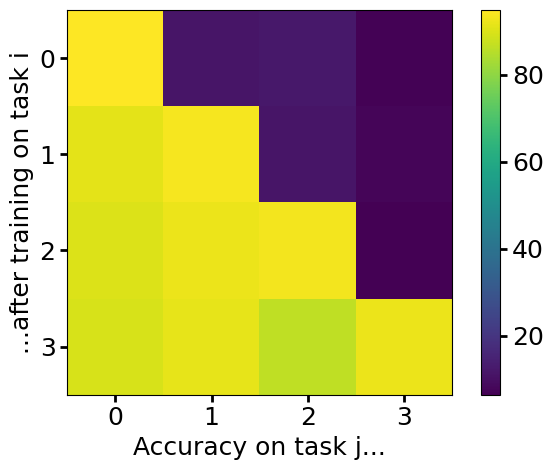

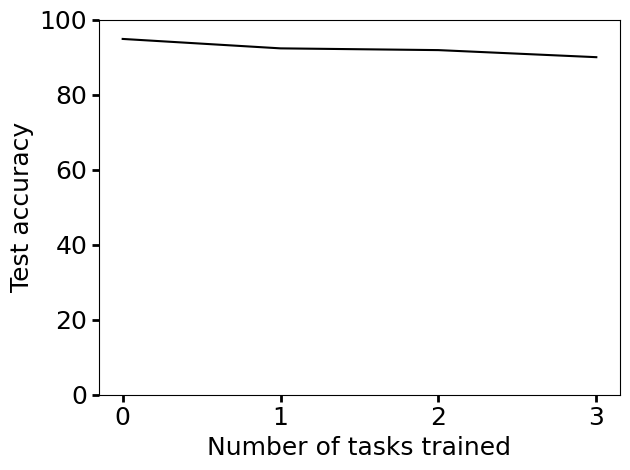

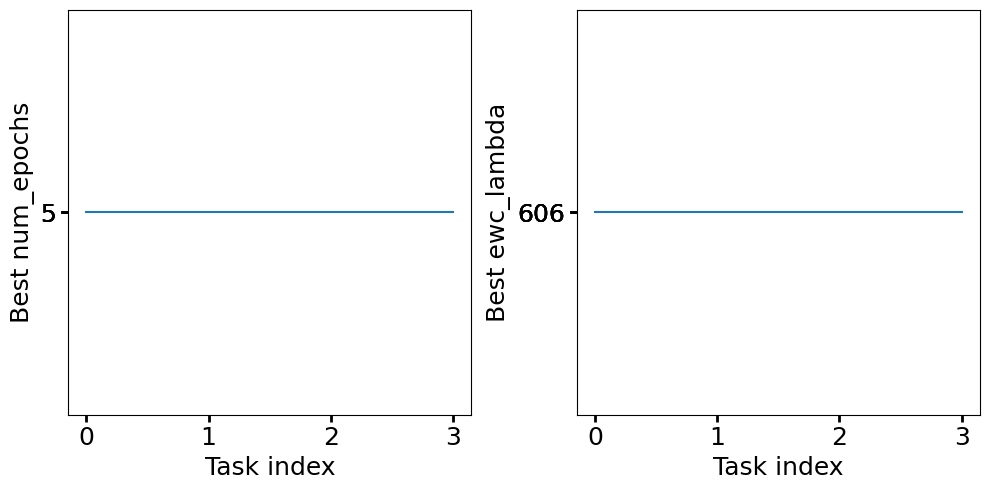

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 24.57it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 37.51it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 45.18it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 50.24it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.99it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.99it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.99it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.99it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.99it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.99it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.99it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.99it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 55.99it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.05it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.05it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 66.05it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 66.05it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 66.05it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 66.05it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 66.05it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.05it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.05it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.22it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.22it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.22it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.22it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.22it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.22it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.22it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.22it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.22it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.70it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.70it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.70it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.70it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.70it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.70it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.70it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.70it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.70it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.51it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.51it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.51it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.51it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.51it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.51it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.51it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.51it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.51it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.07it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.07it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.07it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.07it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.07it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.07it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.07it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.07it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.07it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.94it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 71.94it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 71.94it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 71.94it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 71.94it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 71.94it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 71.94it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 71.94it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 71.94it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.22it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.22it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.22it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.22it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.22it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.22it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.22it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.22it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.22it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.10it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.10it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 72.10it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.10it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.10it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.10it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.10it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.10it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.10it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.19it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.19it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.19it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.19it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.19it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.19it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.19it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.19it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.19it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.33it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.33it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.33it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.33it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.33it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.33it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.33it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.33it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.33it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.90it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.90it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.36it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6932
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7982


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:04, 22.57it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 34.45it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 41.92it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 46.88it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 50.43it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.27it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 53.27it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 53.27it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 53.27it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 53.27it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 53.27it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 53.27it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 53.27it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 53.27it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 64.81it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 64.81it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 64.81it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 64.81it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 64.81it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 64.81it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 64.81it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.81it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.81it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.07it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.07it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.07it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.07it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.07it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.07it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.07it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.07it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.07it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 72.01it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 72.01it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 72.01it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 72.01it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 72.01it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 72.01it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 72.01it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 72.01it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 72.01it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.70it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 73.70it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 73.70it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 73.70it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 73.70it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 73.70it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 73.70it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 73.70it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 73.70it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.73it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 74.73it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 74.73it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 74.73it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 74.73it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 74.73it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 74.73it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 74.73it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 74.73it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.39it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 75.39it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 75.39it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 75.39it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 75.39it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 75.39it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 75.39it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 75.39it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 75.39it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.83it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 75.83it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 75.83it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 75.83it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 75.83it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 75.83it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 75.83it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 75.83it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 75.83it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.12it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 76.12it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 76.12it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 76.12it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 76.12it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 76.12it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 76.12it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 76.12it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 76.12it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.33it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 76.33it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 76.33it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 76.33it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 76.33it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 76.33it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 76.33it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 76.33it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 76.33it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.47it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 76.47it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 76.47it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 76.47it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 76.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 76.47it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 76.47it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 76.47it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 76.47it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.09it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.25it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2030
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9413


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.50it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.96it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 43.80it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 49.16it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.05it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.95it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.95it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.95it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.95it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.95it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.95it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.95it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.95it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 55.95it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 68.50it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 68.50it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.50it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.50it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.50it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.50it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.50it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.50it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.50it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 72.75it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 72.75it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 72.75it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 72.75it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 72.75it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 72.75it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 72.75it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 72.75it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 72.75it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 74.65it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 74.65it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 74.65it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 74.65it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 74.65it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 74.65it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 74.65it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 74.65it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 74.65it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 75.79it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 75.79it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 75.79it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 75.79it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 75.79it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 75.79it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 75.79it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 75.79it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 75.79it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.04it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.04it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 76.04it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 76.04it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 76.04it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 76.04it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 76.04it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 76.04it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 76.04it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 76.62it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 76.62it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 76.62it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 76.62it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 76.62it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 76.62it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 76.62it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 76.62it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 76.62it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 76.96it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 76.96it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 76.96it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 76.96it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 76.96it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 76.96it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 76.96it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 76.96it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 76.96it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.29it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.29it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 77.29it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 77.29it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 77.29it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:00<00:00, 77.29it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:00<00:00, 77.29it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 77.29it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 77.29it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.34it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.34it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 77.34it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 77.34it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 77.34it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 77.34it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 77.34it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 77.34it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 77.34it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.36it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.36it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 77.36it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 77.36it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 77.36it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 77.36it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 77.36it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 77.36it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 77.36it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.91it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.91it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 75.80it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1412
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9564


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.83it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 36.45it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 44.27it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 49.60it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.51it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.54it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.54it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.54it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.54it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.54it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.54it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.54it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 56.54it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 68.93it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 68.93it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.93it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.93it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.93it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.93it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.93it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.93it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.93it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 73.15it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 73.15it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 73.15it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 73.15it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 73.15it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 73.15it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 73.15it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 73.15it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 73.15it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 74.95it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 74.95it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 74.95it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 74.95it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 74.95it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 74.95it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 74.95it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 74.95it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 74.95it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 75.91it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 75.91it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 75.91it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 75.91it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 75.91it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 75.91it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 75.91it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 75.91it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 75.91it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.65it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.65it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 76.65it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 76.65it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 76.65it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 76.65it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 76.65it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 76.65it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 76.65it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 77.13it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 77.13it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 77.13it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 77.13it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 77.13it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 77.13it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 77.13it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 77.13it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 77.13it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 77.43it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 77.43it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 77.43it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 77.43it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 77.43it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 77.43it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 77.43it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 77.43it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 77.43it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.64it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.64it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 77.64it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 77.64it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 77.64it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:00<00:00, 77.64it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:00<00:00, 77.64it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 77.64it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 77.64it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.74it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.74it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 77.74it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 77.74it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 77.74it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 77.74it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 77.74it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 77.74it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 77.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.84it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.84it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 77.84it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 77.84it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 77.84it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 77.84it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 77.84it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 77.84it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 77.84it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 78.45it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 78.45it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.25it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0939
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9721


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.82it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 36.48it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 44.32it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 49.74it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 53.64it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.58it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.58it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.58it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.58it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.58it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.58it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.58it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.58it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 56.58it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 69.02it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 69.02it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.02it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 69.02it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 69.02it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 69.02it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 69.02it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 69.02it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 69.02it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 73.16it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:00, 73.16it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 73.16it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 73.16it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 73.16it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 73.16it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 73.16it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 73.16it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 73.16it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 75.06it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 75.06it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 75.06it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 75.06it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 75.06it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 75.06it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 75.06it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 75.06it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 75.06it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 76.08it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 76.08it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 76.08it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 76.08it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 76.08it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 76.08it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 76.08it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 76.08it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 76.08it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.79it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 76.79it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 76.79it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 76.79it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 76.79it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 76.79it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 76.79it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 76.79it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 76.79it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 77.18it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 77.18it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 77.18it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 77.18it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 77.18it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 77.18it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 77.18it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 77.18it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 77.18it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 77.41it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 77.41it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 77.41it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 77.41it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 77.41it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 77.41it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 77.41it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 77.41it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 77.41it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.60it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 77.60it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 77.60it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:00<00:00, 77.60it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:00<00:00, 77.60it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:00<00:00, 77.60it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:00<00:00, 77.60it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 77.60it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 77.60it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.78it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 77.78it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 77.78it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 77.78it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 77.78it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 77.78it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 77.78it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 77.78it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 77.78it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.84it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 77.84it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 77.84it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 77.84it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 77.84it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 77.84it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 77.84it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 77.84it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 77.84it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 77.84it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 76.32it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0655
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9813


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 39.71it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 51.79it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 57.51it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 60.61it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 62.59it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 64.15it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 65.29it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 65.29it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 65.29it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 65.29it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 65.29it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 65.29it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 65.29it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.29it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.29it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.90it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.90it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 69.90it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 69.90it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 69.90it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 69.90it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 69.90it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 69.90it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.90it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 71.12it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:00, 71.12it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 71.12it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 71.12it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 71.12it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 71.12it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 71.12it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 71.12it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.12it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.79it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.79it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.79it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.79it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.79it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.79it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.79it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.79it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.79it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.14it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.14it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.14it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.14it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.14it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.14it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.14it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.14it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.14it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.38it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.38it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.38it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.38it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.38it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.38it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.38it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.38it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.38it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.53it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.53it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.53it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.53it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.53it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.53it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.53it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.53it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.53it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.62it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.62it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.62it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.62it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.62it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.62it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.62it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.62it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.62it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.68it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.68it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.68it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.68it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.68it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.68it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.68it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.68it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.68it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.68it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.68it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.68it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.68it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.68it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.68it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.68it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.68it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.68it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.74it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.74it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.74it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.74it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.74it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.74it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.74it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.28it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8405
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8051


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.27it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 48.44it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 54.50it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 58.14it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.66it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.41it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.66it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.66it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.66it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.66it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.66it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.66it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.66it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.66it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.66it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.94it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.94it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.94it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.94it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.94it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.94it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.94it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.94it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.94it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.68it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.68it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.68it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.68it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.68it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.68it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.68it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.68it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.68it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.47it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.47it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.47it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.47it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.47it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.47it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.47it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.47it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.47it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.92it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.92it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.92it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.92it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.92it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.92it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.92it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.92it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.92it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.21it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.21it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.21it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.21it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.21it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.21it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.21it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.21it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.21it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.37it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.37it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.37it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.37it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.37it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.37it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.37it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.37it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.37it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.48it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.48it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.48it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.48it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.48it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.48it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.48it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.48it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.48it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.59it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.59it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.59it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.59it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.59it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.59it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.59it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.59it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.59it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.66it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.66it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.66it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.66it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.66it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.66it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.66it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.66it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.66it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.64it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.64it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.64it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.64it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.64it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.64it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.64it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.64it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.64it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.07it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2952
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9372


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.80it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 48.02it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 54.21it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.90it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.46it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.22it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.55it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.55it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.55it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.55it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.55it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.55it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.55it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.55it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.55it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.98it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.98it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.98it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.98it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.98it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.98it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.98it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.98it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.98it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.77it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.77it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.77it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.77it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.77it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.77it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.77it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.77it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.77it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.57it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.57it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.57it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.57it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.57it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.57it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.57it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.57it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.57it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.05it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.05it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.05it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.05it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.05it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.05it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.05it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.05it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.05it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.29it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.29it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.29it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.29it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.29it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.29it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.29it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.29it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.29it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.44it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.44it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.44it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.44it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.44it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.44it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.44it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.44it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.44it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.53it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.53it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.53it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.53it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.53it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.53it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.53it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.53it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.53it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.50it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.50it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.50it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.50it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.50it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.50it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.50it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.50it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.50it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.51it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.51it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.51it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.51it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.51it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.51it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.51it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.51it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.51it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.51it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.51it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.51it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.51it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.51it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.51it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.51it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.51it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.51it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.04it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2166
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9562


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.24it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.45it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.66it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.43it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.03it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 61.87it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.21it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.21it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.21it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.21it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.21it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.21it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.21it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.21it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.21it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.81it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 68.81it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 68.81it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 68.81it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 68.81it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 68.81it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 68.81it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.81it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.81it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.60it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.60it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.60it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.60it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.60it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.60it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.60it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.60it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.60it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.35it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.35it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.35it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.35it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.35it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.35it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.35it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.35it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.35it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.86it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.86it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.86it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.86it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.86it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.86it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.86it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.86it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 71.86it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.16it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.16it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.16it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.16it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.16it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.16it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.16it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.16it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.16it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.34it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.34it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.34it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.34it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.34it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.34it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.34it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.34it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.34it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.47it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.47it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.47it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.47it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.47it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.47it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.47it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.47it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.47it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.57it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.57it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.57it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.57it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.57it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.57it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.57it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.63it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.63it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.63it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.63it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.63it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.63it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.63it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.63it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.63it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.72it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.72it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.72it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.72it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.72it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.72it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.72it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.72it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.72it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.04it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1772
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9659


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.00it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 48.10it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 54.18it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.91it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 60.40it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.18it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.53it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.53it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.53it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.53it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.53it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.53it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.53it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.53it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.53it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.04it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 69.04it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 69.04it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 69.04it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 69.04it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 69.04it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 69.04it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 69.04it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.04it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.75it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 70.75it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:00, 70.75it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 70.75it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 70.75it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 70.75it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 70.75it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 70.75it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 70.75it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.52it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.52it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.52it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.52it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.52it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.52it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.52it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.52it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.52it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.02it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.02it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.02it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.02it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.02it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.02it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.02it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.02it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.02it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.33it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.33it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.33it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.33it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.33it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.33it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.33it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.33it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.33it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.50it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.50it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.50it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.50it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.50it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.50it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.50it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.50it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 72.50it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.62it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 72.62it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 72.62it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 72.62it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 72.62it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 72.62it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 72.62it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 72.62it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 72.62it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.68it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 72.68it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 72.68it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.68it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.68it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.68it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.68it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.68it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.68it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.72it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.72it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.72it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.72it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.72it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.72it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.72it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.72it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.72it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.74it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.74it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.74it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.74it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.74it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.74it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.74it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.74it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.15it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1479
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9758


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 3
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 38.22it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 49.89it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 55.01it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.81it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 60.65it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.79it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.79it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 61.79it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 61.79it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 61.79it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 61.79it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 61.79it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 61.79it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.22it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.22it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 66.22it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 66.22it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 66.22it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 66.22it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 66.22it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.22it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.62it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.62it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.62it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 67.62it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 67.62it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 67.62it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 67.62it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 67.62it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.36it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.36it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.36it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 68.36it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 68.36it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 68.36it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 68.36it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.36it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.75it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.75it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 68.75it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 68.75it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 68.75it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 68.75it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 68.75it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.75it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 69.01it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 69.01it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 69.01it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 69.01it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 69.01it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 69.01it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 69.01it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 69.01it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.17it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.17it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 69.17it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 69.17it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 69.17it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 69.17it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.17it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.17it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.35it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.35it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 69.35it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 69.35it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 69.35it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 69.35it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 69.35it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.35it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.39it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.39it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 69.39it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 69.39it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 69.39it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 69.39it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.39it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 69.39it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.44it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.44it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 69.44it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 69.44it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 69.44it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 69.44it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.44it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.44it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.43it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.43it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 69.43it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 69.43it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 69.43it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 69.43it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 69.43it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.43it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 69.42it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 69.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 69.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 69.42it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 69.42it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 69.42it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 69.42it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 69.42it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 69.38it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 69.38it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 69.38it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 69.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 69.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.94it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7551
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8460


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.23it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.79it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.52it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.05it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.29it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.93it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.93it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.93it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.93it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.93it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.93it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.93it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.93it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.55it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.55it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.55it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.55it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.55it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.55it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.55it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.55it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.39it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.39it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.39it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.39it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 67.39it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 67.39it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 67.39it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 67.39it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.23it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.23it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.23it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.23it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 68.23it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 68.23it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 68.23it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 68.23it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.67it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.67it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.67it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 68.67it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 68.67it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 68.67it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 68.67it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 68.67it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.98it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.98it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 68.98it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 68.98it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 68.98it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 68.98it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 68.98it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 68.98it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 69.13it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 69.13it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.13it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 69.13it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 69.13it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 69.13it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 69.13it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.13it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.29it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.29it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.29it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 69.29it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 69.29it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 69.29it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 69.29it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 69.29it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.31it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.31it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.31it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 69.31it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 69.31it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 69.31it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 69.31it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.31it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 69.36it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 69.36it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.36it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 69.36it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 69.36it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 69.36it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 69.36it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.36it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.41it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.41it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.41it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 69.41it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 69.41it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 69.41it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 69.41it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 69.41it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.40it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.40it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 69.40it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 69.40it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 69.40it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 69.40it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 69.40it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 69.40it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 69.40it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 69.40it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 69.40it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 69.40it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 69.40it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 69.40it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.87it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3646
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9393


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.23it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.73it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.43it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 55.88it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 58.20it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.84it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 59.84it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 59.84it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 59.84it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 59.84it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 59.84it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 59.84it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 59.84it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.53it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 65.53it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.53it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.53it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.53it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.53it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.53it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.53it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.37it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.37it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.37it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.37it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 67.37it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 67.37it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 67.37it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 67.37it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.22it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.22it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.22it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.22it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 68.22it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 68.22it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 68.22it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 68.22it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.65it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.65it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.65it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 68.65it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 68.65it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 68.65it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 68.65it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 68.65it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.92it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 68.92it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 68.92it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 68.92it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 68.92it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 68.92it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 68.92it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 68.92it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 69.11it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 69.11it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.11it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 69.11it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 69.11it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 69.11it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 69.11it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.11it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.21it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.21it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.21it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 69.21it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 69.21it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 69.21it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 69.21it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 69.21it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.33it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 69.33it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 69.33it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 69.33it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 69.33it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 69.33it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 69.33it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 69.33it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 69.41it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 69.41it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 69.41it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 69.41it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 69.41it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 69.41it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 69.41it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 69.41it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.45it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 69.45it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 69.45it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 69.45it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 69.45it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 69.45it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 69.45it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 69.45it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.23it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 69.23it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 69.23it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 69.23it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 69.23it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 69.23it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 69.23it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 69.23it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.62it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.62it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 68.62it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 68.62it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 68.62it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.62it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.56it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3015
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9519


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.44it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.50it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.96it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.23it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.38it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.90it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.90it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.90it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.90it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.90it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.90it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.90it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.90it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.37it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.37it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.37it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.37it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.37it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.37it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.37it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.37it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.03it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.03it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.03it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 65.03it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 65.03it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 65.03it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 65.03it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 65.03it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.83it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.83it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.83it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.83it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.83it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.83it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.83it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.83it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.68it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.68it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.68it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.68it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.68it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.68it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.68it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.68it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.18it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 66.18it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 66.18it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 66.18it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 66.18it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 66.18it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 66.18it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 66.18it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.45it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 66.45it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 66.45it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 66.45it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 66.45it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 66.45it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 66.45it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 66.45it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.64it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 66.64it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 66.64it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 66.64it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 66.64it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 66.64it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 66.64it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 66.64it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.75it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.75it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.75it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.75it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.75it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.75it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.75it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.75it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.83it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.83it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.83it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.83it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.83it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.83it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.83it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.83it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.91it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.91it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.91it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.91it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.91it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.91it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.91it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.91it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.51it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.51it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.51it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.51it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.51it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.51it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.51it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.51it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.29it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.29it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.29it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.29it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.29it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.29it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.10it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2633
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9612


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.98it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.85it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.25it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.51it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.72it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.28it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.28it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.28it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.28it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.28it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.28it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.28it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.28it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.49it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.49it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.49it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.49it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.49it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.49it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.49it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.49it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.11it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.11it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.11it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.11it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.11it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.11it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.11it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.11it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.85it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 64.85it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 64.85it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 64.85it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 64.85it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 64.85it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 64.85it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 64.85it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.28it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.28it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.28it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.28it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.28it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.28it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.28it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.28it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.54it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.54it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.54it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.54it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.54it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.54it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.54it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.54it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.70it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.70it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.70it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.70it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.70it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.70it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.70it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.70it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.82it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.82it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.82it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.82it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.82it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.82it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.82it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.82it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.92it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.92it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.92it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.92it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 65.92it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.92it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.92it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.92it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.04it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.04it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.04it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.04it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.04it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.04it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.04it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.04it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.06it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.06it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.06it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.06it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.06it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.06it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.06it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.06it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.35it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.35it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.35it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.35it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.35it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.35it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.35it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.35it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 67.24it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 67.24it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 67.24it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 67.24it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 67.24it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.24it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.94it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2319
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9690


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 4
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 36.99it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.63it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.43it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.30it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.67it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.70it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.70it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.70it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.70it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.70it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.70it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.70it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.70it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 61.60it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 61.60it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 61.60it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 61.60it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 61.60it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 61.60it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 61.60it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 61.60it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.54it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.54it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 62.54it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 62.54it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 62.54it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 62.54it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 62.54it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 62.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.92it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.92it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.92it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.92it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.92it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.92it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.92it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.92it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.14it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.14it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.14it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.14it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.14it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.14it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.14it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.14it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.30it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.30it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.30it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.30it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.30it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.30it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.30it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.30it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.41it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.41it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.41it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.41it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.41it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.41it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.41it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.41it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.48it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.48it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.48it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.48it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.48it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.48it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.48it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.48it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.50it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.50it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.50it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.50it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.50it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.50it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.50it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.50it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.54it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.56it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.56it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.56it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.56it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.56it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.56it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.56it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.56it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.56it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.56it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.56it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.56it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.56it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.56it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.56it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.56it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.61it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.61it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.61it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.61it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.61it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.61it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.28it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.9173
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8454


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.88it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.22it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.16it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.19it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.16it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.64it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.64it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.64it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.64it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.64it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.64it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.64it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.64it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.49it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.49it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.49it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.49it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.49it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.49it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.49it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.49it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.90it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.90it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.90it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.90it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.90it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.90it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.90it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.90it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.49it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.49it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.49it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.49it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.49it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.49it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.49it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.49it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.90it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.90it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.90it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.90it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.90it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.90it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.90it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.90it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.19it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.19it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.19it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.19it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.19it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.19it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.19it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.19it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.31it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.31it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.31it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.31it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.31it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.31it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.31it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.31it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.36it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.36it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.36it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.36it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.36it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.36it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.36it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.36it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.42it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.42it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.42it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.42it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.42it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.42it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.42it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.42it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.49it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.49it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.49it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.49it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.49it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.49it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.49it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.49it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.55it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.55it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.55it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.55it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.55it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.55it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.55it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.55it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.56it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.56it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.56it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.56it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.56it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.56it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.56it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.56it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.56it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.56it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.56it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.56it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.56it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.56it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.10it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4806
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9323


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.85it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.20it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.32it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.32it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.21it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.66it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.66it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.66it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.66it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.66it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.66it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.66it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.66it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.39it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.39it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.39it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.39it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.39it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.39it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.39it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.39it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.80it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.80it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.80it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.80it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.80it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.80it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.80it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.80it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.54it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.54it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.54it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.54it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.54it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.54it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.54it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.54it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.92it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.92it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.92it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.92it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.92it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.92it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.92it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.92it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.12it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.12it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.12it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.12it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.12it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.12it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.12it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.12it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.23it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.23it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.23it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.23it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.23it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.23it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.23it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.23it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.33it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.33it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.33it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.33it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.33it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.33it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.33it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.33it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.40it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.40it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.40it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.40it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.40it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.40it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.40it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.40it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.45it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.45it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.45it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.45it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.45it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.45it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.45it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.45it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.47it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.47it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.47it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.47it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.47it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.47it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.47it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.47it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.53it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.53it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.53it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.53it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.53it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.53it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.53it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.53it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.56it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.56it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.56it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.56it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.56it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.56it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.08it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4086
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9471


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.68it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.07it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.15it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.11it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.12it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.54it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.54it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.54it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.54it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.54it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.54it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.54it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.28it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.28it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.28it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.28it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.28it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.28it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.28it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.28it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.83it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.83it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.83it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.83it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.83it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.83it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.83it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.83it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.64it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.64it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.64it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.64it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.64it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.64it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.64it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.64it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.22it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.22it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.22it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.22it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.22it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.22it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.22it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.22it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.61it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.61it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.61it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.61it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.61it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.61it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.61it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.61it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.81it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.81it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.81it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.81it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.81it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.81it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.81it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.81it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.98it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.98it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.98it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.98it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.98it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.98it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.98it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.98it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 64.06it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 64.06it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 64.06it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 64.06it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 64.06it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 64.06it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 64.06it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 64.06it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 64.13it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 64.13it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 64.13it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 64.13it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 64.13it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 64.13it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 64.13it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 64.13it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.10it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.10it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 64.10it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 64.10it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 64.10it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 64.10it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 64.10it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 64.10it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 64.26it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 64.26it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 64.26it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 64.26it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 64.26it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 64.26it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 64.26it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 64.26it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.32it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.32it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 64.32it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 64.32it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 64.32it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.32it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.61it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3657
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9592


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.95it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.49it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.52it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.57it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.99it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.99it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.99it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.99it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.99it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.99it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.99it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.99it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.45it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.45it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.45it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.45it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.45it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.45it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.45it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.45it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.14it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 62.14it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 62.14it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 62.14it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 62.14it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 62.14it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 62.14it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 62.14it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.96it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.96it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.96it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.96it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.96it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.96it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.96it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.96it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.48it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.48it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.48it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.48it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.48it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.48it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.48it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.48it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.78it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.78it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.78it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.78it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.78it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.78it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.78it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.78it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 64.01it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 64.01it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 64.01it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 64.01it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 64.01it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 64.01it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 64.01it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 64.01it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 64.13it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 64.13it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 64.13it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 64.13it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 64.13it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 64.13it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 64.13it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 64.13it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 64.22it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 64.22it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 64.22it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 64.22it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 64.22it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 64.22it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 64.22it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 64.22it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 64.25it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 64.25it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 64.25it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 64.25it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 64.25it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 64.25it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 64.25it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 64.25it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.30it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 64.30it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 64.30it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 64.30it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 64.30it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 64.30it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 64.30it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 64.30it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 64.35it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 64.35it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 64.35it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 64.35it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 64.35it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 64.35it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 64.35it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 64.35it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.39it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 64.39it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 64.39it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 64.39it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 64.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.39it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.77it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3495
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9615


-- >> End of training phase << --



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 25.65it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 38.49it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 45.99it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 50.70it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.01it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.52it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 56.52it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 56.52it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 56.52it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 56.52it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 56.52it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 56.52it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 56.52it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 56.52it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.71it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 66.71it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 66.71it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 66.71it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 66.71it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 66.71it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 66.71it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 66.71it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.71it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.86it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.86it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.86it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.86it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.86it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.86it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.86it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.86it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.86it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.33it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.33it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.33it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.33it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.33it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.33it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.33it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.33it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.33it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.23it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.23it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.23it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.23it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.23it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.23it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.23it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.23it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.23it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.72it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.72it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.72it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.72it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.72it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.72it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.72it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.72it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.72it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 73.01it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 73.01it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 73.01it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 73.01it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 73.01it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 73.01it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 73.01it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 73.01it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.22it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.22it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.22it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.22it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.22it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.22it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.22it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.22it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.22it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.36it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.36it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.36it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.36it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.36it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.36it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.36it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.36it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.36it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.41it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.41it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.41it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.41it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.41it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.41it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.41it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.41it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.41it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.52it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.52it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.52it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.52it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.52it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.52it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.52it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.52it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.52it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.05it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.05it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.34it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6937
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7971


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:17,  5.20it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:17,  5.20it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:17,  5.20it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:17,  5.20it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:17,  5.20it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:17,  5.20it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:16,  5.20it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:16,  5.20it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:16,  5.20it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 35.71it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:02, 35.71it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:02, 35.71it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:02, 35.71it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:02, 35.71it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:02, 35.71it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:02, 35.71it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:02, 35.71it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:02, 35.71it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 50.52it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 50.52it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 50.52it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 50.52it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 50.52it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 50.52it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 50.52it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 50.52it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 50.52it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 58.73it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 58.73it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 58.73it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 58.73it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 58.73it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 58.73it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 58.73it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 58.73it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:01, 58.73it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 63.76it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 63.76it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.76it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.76it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.76it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.76it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.76it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.76it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.76it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.02it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.02it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.02it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.02it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.02it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.02it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.02it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.02it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.02it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.19it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 69.19it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 69.19it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 69.19it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 69.19it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 69.19it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 69.19it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 69.19it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 69.19it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.54it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.54it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.54it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.54it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.54it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:01<00:00, 70.54it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:01<00:00, 70.54it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 70.54it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 70.54it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 71.46it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 71.46it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 71.46it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 71.46it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 71.46it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 71.46it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 71.46it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.46it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.46it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.06it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 72.06it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 72.06it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 72.06it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 72.06it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 72.06it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 72.06it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 72.06it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 72.06it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.50it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 72.50it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 72.50it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 72.50it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 72.50it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 72.50it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 72.50it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 72.50it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 72.50it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.81it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 72.81it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 72.81it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 72.81it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 72.81it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 72.81it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.81it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 64.63it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2009
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9429


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:04, 23.12it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.23it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 42.65it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 47.67it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.08it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.08it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.08it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.08it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.08it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.08it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.08it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.08it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.08it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.49it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.49it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.49it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.49it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.49it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.49it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.49it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.49it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.49it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.25it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.25it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.25it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.25it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.25it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.25it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.25it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.25it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.25it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.01it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.01it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.01it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.01it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.01it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.01it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.01it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.01it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.01it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.95it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.95it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.95it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.95it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.95it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.95it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.95it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.95it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.95it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.58it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.58it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.58it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.58it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.58it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.58it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.58it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.58it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.58it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.87it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.87it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.87it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.87it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.87it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.87it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.87it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.87it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.87it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.10it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.10it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.10it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.10it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.10it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.10it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.10it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.10it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.10it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.22it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.22it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.22it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.22it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.22it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.22it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.22it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.22it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.22it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.35it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.35it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.35it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.35it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.35it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.35it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.35it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.35it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.35it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.47it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.47it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.47it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.47it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.47it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.47it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.47it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.47it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.04it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.04it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.08it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1416
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9581


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.46it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.60it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 43.03it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 48.05it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.64it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.40it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.40it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.40it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.40it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.40it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.40it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.40it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.40it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.40it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.64it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.64it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.64it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.64it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.64it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.64it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.64it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.64it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.64it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.33it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.33it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.33it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.33it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.33it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.33it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.33it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.33it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.33it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.08it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.08it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.08it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.08it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.08it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.08it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.08it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.08it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.08it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.00it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 72.00it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 72.00it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 72.00it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 72.00it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 72.00it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 72.00it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 72.00it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 72.00it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.60it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.60it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.60it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.60it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.60it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.60it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.60it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.60it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.60it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.97it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.97it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.97it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.97it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.97it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.97it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.97it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.97it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.97it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.17it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.17it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.17it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.17it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.17it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.17it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.17it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.17it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.17it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.34it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.34it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.34it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.34it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.34it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.34it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.34it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.34it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.34it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.42it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.42it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.42it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.42it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.42it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.42it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.42it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.45it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.45it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.45it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.45it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.45it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.45it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.45it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.45it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.45it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 73.97it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 73.97it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.12it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1025
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9683


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:03, 23.45it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 35.61it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:02, 43.04it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 48.09it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 51.67it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.41it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 54.41it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 54.41it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 54.41it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 54.41it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 54.41it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 54.41it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 54.41it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 54.41it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.67it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.67it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.67it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.67it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.67it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.67it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.67it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.67it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.67it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.42it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 69.42it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.42it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.42it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.42it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.42it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.42it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.42it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.42it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.05it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 71.05it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 71.05it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 71.05it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 71.05it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 71.05it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 71.05it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 71.05it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 71.05it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.97it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 71.97it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 71.97it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 71.97it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 71.97it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 71.97it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 71.97it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 71.97it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 71.97it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.46it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 72.46it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 72.46it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 72.46it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 72.46it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 72.46it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 72.46it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 72.46it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 72.46it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.92it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 72.92it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 72.92it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 72.92it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 72.92it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 72.92it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 72.92it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 72.92it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 72.92it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.24it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 73.24it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 73.24it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 73.24it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 73.24it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 73.24it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 73.24it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 73.24it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 73.24it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.47it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 73.47it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:00<00:00, 73.47it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 73.47it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 73.47it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 73.47it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 73.47it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 73.47it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 73.47it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.51it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 73.51it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 73.51it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 73.51it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 73.51it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 73.51it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 73.51it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 73.51it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 73.51it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.61it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 73.61it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 73.61it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 73.61it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 73.61it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 73.61it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 73.61it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 73.61it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 73.61it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.14it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 74.14it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 72.19it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0723
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9792


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 39.88it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 51.33it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 56.99it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 59.57it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 61.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 62.54it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.53it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 63.53it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 63.53it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 63.53it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 63.53it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 63.53it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 63.53it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.53it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.09it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 67.09it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.09it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.09it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.09it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.09it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.09it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.09it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.29it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 68.29it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 68.29it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 68.29it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 68.29it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 68.29it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 68.29it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 68.29it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.86it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 68.86it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 68.86it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 68.86it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 68.86it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 68.86it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 68.86it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 68.86it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 68.86it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 69.35it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 69.35it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 69.35it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 69.35it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 69.35it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 69.35it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 69.35it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 69.35it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 68.79it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 68.79it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 68.79it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 68.79it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 68.79it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 68.79it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 68.79it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 68.79it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 68.67it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 68.67it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 68.67it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 68.67it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 68.67it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 68.67it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 68.67it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 68.67it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 68.74it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 68.74it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 68.74it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 68.74it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 68.74it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 68.74it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 68.74it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 68.74it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 68.76it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 68.76it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 68.76it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 68.76it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 68.76it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 68.76it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 68.76it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 68.76it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 68.73it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 68.73it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 68.73it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 68.73it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 68.73it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 68.73it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.73it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 68.73it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 68.76it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 68.76it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 68.76it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 68.76it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 68.76it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 68.76it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.76it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 68.76it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 68.90it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 68.90it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 68.90it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 68.90it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 68.90it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 68.90it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.90it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 68.90it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 68.90it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 69.73it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 69.73it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 69.73it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.94it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7512
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8329


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.10it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.02it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.05it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.67it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.11it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 60.85it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.10it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.10it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 62.10it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 62.10it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 62.10it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 62.10it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 62.10it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.10it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.10it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.52it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.52it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.52it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.52it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.52it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.52it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.52it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.52it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.52it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.25it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.25it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.25it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.25it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.25it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.25it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.25it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.25it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.25it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.03it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.03it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.03it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.03it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.03it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.03it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.03it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.03it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.03it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.50it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.50it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.50it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.50it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.50it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.50it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.50it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.77it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.77it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.77it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.77it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.77it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.77it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.77it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.77it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.77it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.94it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.94it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.94it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.94it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.94it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.94it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.94it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.94it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.94it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.05it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.05it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 71.05it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 71.05it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 71.05it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 71.05it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 71.05it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 71.05it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.05it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.13it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.13it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.13it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.13it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.13it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.13it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.13it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.18it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.18it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.18it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.18it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.18it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.18it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.18it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.18it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.18it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.22it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.22it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.22it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.22it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.22it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.22it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.22it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.63it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3005
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9397


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.57it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.44it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.47it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.95it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.38it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 61.08it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.36it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.36it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 62.36it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 62.36it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 62.36it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 62.36it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 62.36it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.36it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.36it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.62it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.62it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.62it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.62it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.62it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.62it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.62it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.62it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.62it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.29it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.29it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.29it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.29it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.29it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.29it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.29it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.29it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.29it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.09it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.09it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.09it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.09it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.09it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.09it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.09it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.09it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.09it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.28it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.28it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.28it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.28it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.28it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.28it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.28it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.28it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.28it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.62it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.62it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.62it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.62it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.62it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.62it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.62it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.62it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.62it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.85it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.85it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.85it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.85it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.85it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.85it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.85it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.85it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.85it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 70.99it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 70.99it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 70.99it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 70.99it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 70.99it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 70.99it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 70.99it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 70.99it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 70.99it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.08it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.08it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.08it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.08it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.08it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.08it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.08it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.08it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.08it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.15it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.15it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.15it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.15it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.15it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.15it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.15it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.15it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.15it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.20it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.20it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.20it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.20it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.20it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.20it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.20it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.20it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.20it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.61it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2407
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9525


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.47it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.23it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.28it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.86it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.25it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 60.94it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.24it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.24it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 62.24it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 62.24it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 62.24it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 62.24it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 62.24it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.24it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.24it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.57it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.57it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.57it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.57it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.57it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.57it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.57it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.57it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.57it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.28it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.28it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.28it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.28it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.28it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.28it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.28it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.28it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.28it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.07it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.07it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.07it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.07it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.07it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.07it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.07it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.07it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.07it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.50it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.50it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.50it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.50it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.50it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.50it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.50it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.76it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.76it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.76it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.76it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.76it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.76it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.76it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.76it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.76it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.95it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.95it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.95it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.95it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.95it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.95it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.95it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.95it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.95it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.06it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.06it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 71.06it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 71.06it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 71.06it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 71.06it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 71.06it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 71.06it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.06it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.13it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.13it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.13it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.13it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.13it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.13it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.13it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.19it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.19it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.19it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.19it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.19it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.19it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.19it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.19it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.19it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.03it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.03it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.03it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.03it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.03it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.03it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.03it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.03it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.03it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.59it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2039
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9638


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.61it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.39it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 53.39it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 56.91it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.30it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 61.04it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.33it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 62.33it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 62.33it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 62.33it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 62.33it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 62.33it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 62.33it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.33it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.33it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.60it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 67.60it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 67.60it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 67.60it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 67.60it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 67.60it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 67.60it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 67.60it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 67.60it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.29it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 69.29it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 69.29it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:00, 69.29it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:00, 69.29it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:00, 69.29it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 69.29it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 69.29it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 69.29it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.07it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 70.07it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 70.07it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 70.07it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 70.07it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 70.07it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 70.07it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 70.07it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 70.07it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 70.50it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 70.50it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 70.50it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 70.50it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 70.50it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 70.50it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 70.50it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 70.50it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.79it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 70.79it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 70.79it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 70.79it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 70.79it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 70.79it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 70.79it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 70.79it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 70.79it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.93it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 70.93it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 70.93it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 70.93it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 70.93it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 70.93it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 70.93it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 70.93it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 70.93it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.08it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 71.08it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 71.08it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 71.08it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 71.08it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 71.08it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:00<00:00, 71.08it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:00<00:00, 71.08it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:00<00:00, 71.08it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 71.13it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 71.13it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 71.13it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 71.13it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 71.13it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 71.13it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 71.13it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 71.13it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.18it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 71.18it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 71.18it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 71.18it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 71.18it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 71.18it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 71.18it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 71.18it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 71.18it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.22it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 71.22it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 71.22it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 71.22it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 71.22it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 71.22it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 71.22it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 71.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 71.22it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 70.65it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1750
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9722


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 3
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 38.79it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 49.84it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 55.09it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 57.68it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 59.39it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 60.28it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.29it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 61.29it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 61.29it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 61.29it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 61.29it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 61.29it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 61.29it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 61.29it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.20it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 65.20it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 65.20it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 65.20it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 65.20it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 65.20it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 65.20it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.20it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.52it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 66.52it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 66.52it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 66.52it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 66.52it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 66.52it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 66.52it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.52it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 67.05it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 67.05it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 67.05it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 67.05it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 67.05it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 67.05it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 67.05it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.05it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 67.43it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 67.43it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 67.43it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 67.43it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 67.43it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 67.43it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 67.43it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.43it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.66it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.66it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.66it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.66it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.66it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.66it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.66it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.66it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 67.75it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 67.75it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 67.75it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 67.75it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 67.75it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 67.75it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 67.75it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.75it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.85it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.85it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 67.85it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 67.85it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 67.85it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 67.85it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 67.85it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 67.85it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 67.92it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 67.92it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 67.92it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 67.92it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 67.92it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 67.92it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 67.92it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 67.92it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 67.94it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 67.94it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 67.94it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 67.94it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 67.94it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 67.94it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 67.94it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 67.94it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 67.79it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 67.79it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 67.79it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 67.79it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 67.79it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 67.79it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 67.79it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 67.79it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 67.87it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 67.87it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 67.87it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 67.87it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 67.87it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 67.87it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 67.87it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 67.87it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 67.94it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 67.94it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 67.94it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 67.94it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.94it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.56it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.9884
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8247


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.15it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.47it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 51.12it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.54it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.87it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 58.50it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 58.50it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 58.50it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 58.50it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 58.50it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 58.50it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 58.50it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 58.50it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.89it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 63.89it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 63.89it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 63.89it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 63.89it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 63.89it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 63.89it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 63.89it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.86it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.86it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.86it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 65.86it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 65.86it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 65.86it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 65.86it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 65.86it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.80it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.80it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 66.80it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 66.80it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 66.80it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 66.80it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 66.80it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 66.80it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.19it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.19it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 67.19it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 67.19it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 67.19it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 67.19it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 67.19it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 67.19it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.58it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.58it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.58it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.58it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.58it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.58it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.58it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.58it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.77it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.77it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 67.77it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 67.77it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 67.77it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 67.77it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 67.77it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 67.77it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.89it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.89it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.89it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 67.89it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 67.89it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 67.89it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 67.89it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 67.89it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 68.00it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 68.00it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 68.00it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 68.00it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 68.00it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 68.00it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 68.00it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 68.00it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 68.03it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 68.03it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 68.03it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 68.03it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 68.03it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 68.03it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 68.03it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 68.03it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.06it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 68.06it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 68.06it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 68.06it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 68.06it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 68.06it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 68.06it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 68.06it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.13it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 68.13it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 68.13it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 68.13it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 68.13it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 68.13it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 68.13it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 68.13it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.11it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 68.11it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 68.11it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 68.11it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 68.11it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 68.11it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.51it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4273
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9343


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 35.32it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 46.56it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 52.09it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 55.40it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.89it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 58.53it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 58.53it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 58.53it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 58.53it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 58.53it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 58.53it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 58.53it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 58.53it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 64.02it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 64.02it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 64.02it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 64.02it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 64.02it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 64.02it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 64.02it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 64.02it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.83it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 65.83it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 65.83it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 65.83it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 65.83it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 65.83it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 65.83it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 65.83it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.78it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 66.78it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:00, 66.78it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 66.78it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 66.78it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 66.78it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 66.78it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 66.78it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.31it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 67.31it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 67.31it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 67.31it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 67.31it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 67.31it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 67.31it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 67.31it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.44it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 67.44it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 67.44it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 67.44it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 67.44it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 67.44it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 67.44it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 67.44it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.56it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 67.56it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 67.56it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 67.56it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 67.56it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 67.56it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 67.56it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 67.56it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.71it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 67.71it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 67.71it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 67.71it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 67.71it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 67.71it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 67.71it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 67.71it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 67.82it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 67.82it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 67.82it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 67.82it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 67.82it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:00<00:00, 67.82it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:00<00:00, 67.82it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 67.82it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 67.87it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 67.87it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 67.87it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 67.87it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 67.87it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 67.87it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 67.87it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 67.87it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 67.07it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 67.07it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 67.07it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 67.07it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 67.07it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 67.07it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 67.07it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 67.07it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.70it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.70it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.70it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.70it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.70it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.70it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.70it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.70it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.49it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.49it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.49it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.49it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.49it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.49it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.79it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3529
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9489


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.97it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.81it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.18it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.44it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 55.64it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.15it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.15it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.15it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.15it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.15it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.15it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.15it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.15it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.46it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.46it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.46it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.46it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.46it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.46it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.46it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.46it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.21it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.21it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.21it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.21it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.21it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.21it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.21it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.21it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.00it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.00it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.00it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 65.00it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.00it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.00it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.00it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.00it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.43it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.43it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.43it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.43it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.43it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.43it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.43it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.43it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.68it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.68it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.68it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.68it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.68it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.68it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.68it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.68it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.78it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.78it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.78it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.78it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.78it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.78it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.78it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.78it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.89it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.89it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.89it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.89it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.89it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.89it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.89it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.89it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.93it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 65.93it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 65.93it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 65.93it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 65.93it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 65.93it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 65.93it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 65.93it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.00it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.00it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.00it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.00it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.00it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.00it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.00it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.00it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.04it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.04it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.04it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.04it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.04it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.04it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.04it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.04it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.10it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.10it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.10it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.10it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.10it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.10it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.10it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.10it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.10it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.10it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.10it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.10it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.10it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.10it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.58it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3185
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9581


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 34.88it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 45.72it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 50.95it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 54.09it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 56.15it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.67it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 57.67it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 57.67it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 57.67it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 57.67it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 57.67it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 57.67it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 57.67it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.70it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 62.70it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 62.70it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 62.70it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 62.70it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 62.70it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 62.70it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 62.70it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.39it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 64.39it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 64.39it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 64.39it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 64.39it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 64.39it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 64.39it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 64.39it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.09it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 65.09it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 65.09it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:00, 65.09it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:00, 65.09it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:00, 65.09it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 65.09it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 65.09it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.49it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 65.49it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 65.49it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 65.49it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 65.49it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 65.49it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 65.49it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 65.49it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.71it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 65.71it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 65.71it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 65.71it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 65.71it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 65.71it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 65.71it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 65.71it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.86it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 65.86it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 65.86it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 65.86it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 65.86it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 65.86it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 65.86it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 65.86it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.96it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 65.96it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 65.96it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 65.96it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 65.96it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 65.96it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 65.96it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 65.96it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.01it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 66.01it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 66.01it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:00<00:00, 66.01it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:00<00:00, 66.01it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 66.01it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 66.01it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 66.01it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.07it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 66.07it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 66.07it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 66.07it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 66.07it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 66.07it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 66.07it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 66.07it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.14it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 66.14it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 66.14it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 66.14it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 66.14it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 66.14it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 66.14it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 66.14it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.18it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 66.18it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 66.18it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 66.18it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 66.18it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 66.18it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 66.18it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 66.18it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.25it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 66.25it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 66.25it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 66.25it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 66.25it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 66.25it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 65.69it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2979
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9617


-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 4
-- >> Start of training phase << --


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 37.21it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:01, 47.66it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 51.38it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 53.15it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.34it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.17it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.17it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.17it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.17it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.17it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.17it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.17it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.17it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.50it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 59.50it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 59.50it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 59.50it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 59.50it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 59.50it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 59.50it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 59.50it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.25it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.25it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.25it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.25it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.25it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.25it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.25it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.25it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.09it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.09it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.09it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.09it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.09it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.09it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.09it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.09it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.60it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.60it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.60it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.60it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.60it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.60it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.60it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.60it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.93it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 62.93it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 62.93it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 62.93it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 62.93it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 62.93it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 62.93it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 62.93it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.12it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.12it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.12it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.12it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.12it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.12it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.12it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.12it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.22it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.22it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.22it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.22it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.22it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.22it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.22it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.22it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.31it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.31it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.31it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.31it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.31it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.31it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.31it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.31it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.39it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.39it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.39it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.39it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.39it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.39it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.39it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.39it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.44it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.44it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.44it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.44it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.44it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.44it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.44it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.44it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.47it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.47it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.47it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.47it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.47it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.47it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.47it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.46it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.46it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.46it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.46it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.46it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.46it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 62.89it/s]


Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 1.1286
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8350


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.86it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.16it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.14it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.15it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.14it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.54it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.54it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.54it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.54it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.54it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.54it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.54it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.54it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.29it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.29it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.29it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.29it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.29it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.29it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.29it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.29it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.80it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.80it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.80it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.80it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.80it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.80it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.80it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.80it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.50it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.50it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.50it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.50it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.50it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.50it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.50it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.50it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.86it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.86it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.86it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.86it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.86it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.86it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.86it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.86it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.05it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.05it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.05it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.05it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.05it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.05it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.05it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.05it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.24it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.24it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.24it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.24it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.24it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.24it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.24it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.24it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.33it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.33it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.33it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.33it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.33it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.33it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.33it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.33it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.40it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.40it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.40it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.40it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.40it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.40it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.40it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.40it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.44it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.44it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.44it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.44it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.44it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.44it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.44it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.44it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.47it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.47it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.47it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.47it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.47it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.47it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.47it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.47it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.47it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.47it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.47it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.47it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.47it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.47it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.47it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.47it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.47it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.47it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.47it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.47it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.47it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.03it/s]


Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5895
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9263


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.89it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.23it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.27it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.26it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.21it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.62it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.62it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.62it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.62it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.62it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.62it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.62it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.62it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.32it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.32it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.32it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.32it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.32it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.32it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.32it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.32it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.75it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.75it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.75it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.75it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.75it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.75it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.75it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.75it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.51it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.51it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.51it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.51it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.51it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.51it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.51it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.51it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.05it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 63.05it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 63.05it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 63.05it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 63.05it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 63.05it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 63.05it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 63.05it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.45it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.45it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.45it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.45it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.45it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.45it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.45it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.45it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.75it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.75it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.75it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.75it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.75it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.75it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.75it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.75it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.85it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.85it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.85it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.85it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.85it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.85it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.85it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.85it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.91it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.91it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:00<00:00, 63.91it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.91it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.91it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.91it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.91it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.91it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.94it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.94it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.94it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.94it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.94it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.94it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.94it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.94it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.92it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.92it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.92it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.92it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.92it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.92it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.92it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.92it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.77it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.77it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.77it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.77it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.77it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.77it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.77it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.77it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.71it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.71it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.71it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.71it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.71it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.71it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.31it/s]


Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5237
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9368


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.52it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 43.86it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 48.96it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 51.97it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.01it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.42it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.42it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.42it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.42it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.42it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.42it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.42it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.42it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.32it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.32it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.32it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.32it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.32it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.32it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.32it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.32it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.79it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.79it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.79it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.79it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.79it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.79it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.79it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.79it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.51it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.51it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.51it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.51it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.51it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.51it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.51it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.51it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.90it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.90it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.90it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.90it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.90it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.90it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.90it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.90it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.14it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.14it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.14it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.14it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.14it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.14it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.14it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.14it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.34it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.34it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.34it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.34it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.34it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.34it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.34it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.34it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.51it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.51it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.51it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.51it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.51it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.51it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.51it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.51it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.53it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.53it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.53it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.53it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.53it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.53it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.53it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.53it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.56it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.56it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.56it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.56it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.56it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.56it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.56it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.56it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.57it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.57it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.57it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.57it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.57it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.57it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.58it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.58it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.58it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.58it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.58it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.58it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.58it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.58it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.58it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.58it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.58it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.58it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.58it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.58it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.12it/s]


Epoch 3 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4787
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9495


0it [00:00, ?it/s]

  1%|█                                                                                                       | 1/94 [00:00<00:02, 33.81it/s]

  2%|██▏                                                                                                     | 2/94 [00:00<00:02, 44.19it/s]

  3%|███▎                                                                                                    | 3/94 [00:00<00:01, 49.26it/s]

  4%|████▍                                                                                                   | 4/94 [00:00<00:01, 52.24it/s]

  5%|█████▌                                                                                                  | 5/94 [00:00<00:01, 54.17it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.57it/s]

  6%|██████▋                                                                                                 | 6/94 [00:00<00:01, 55.57it/s]

  7%|███████▋                                                                                                | 7/94 [00:00<00:01, 55.57it/s]

  9%|████████▊                                                                                               | 8/94 [00:00<00:01, 55.57it/s]

 10%|█████████▉                                                                                              | 9/94 [00:00<00:01, 55.57it/s]

 11%|██████████▉                                                                                            | 10/94 [00:00<00:01, 55.57it/s]

 12%|████████████                                                                                           | 11/94 [00:00<00:01, 55.57it/s]

 13%|█████████████▏                                                                                         | 12/94 [00:00<00:01, 55.57it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.34it/s]

 14%|██████████████▏                                                                                        | 13/94 [00:00<00:01, 60.34it/s]

 15%|███████████████▎                                                                                       | 14/94 [00:00<00:01, 60.34it/s]

 16%|████████████████▍                                                                                      | 15/94 [00:00<00:01, 60.34it/s]

 17%|█████████████████▌                                                                                     | 16/94 [00:00<00:01, 60.34it/s]

 18%|██████████████████▋                                                                                    | 17/94 [00:00<00:01, 60.34it/s]

 19%|███████████████████▋                                                                                   | 18/94 [00:00<00:01, 60.34it/s]

 20%|████████████████████▊                                                                                  | 19/94 [00:00<00:01, 60.34it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.78it/s]

 21%|█████████████████████▉                                                                                 | 20/94 [00:00<00:01, 61.78it/s]

 22%|███████████████████████                                                                                | 21/94 [00:00<00:01, 61.78it/s]

 23%|████████████████████████                                                                               | 22/94 [00:00<00:01, 61.78it/s]

 24%|█████████████████████████▏                                                                             | 23/94 [00:00<00:01, 61.78it/s]

 26%|██████████████████████████▎                                                                            | 24/94 [00:00<00:01, 61.78it/s]

 27%|███████████████████████████▍                                                                           | 25/94 [00:00<00:01, 61.78it/s]

 28%|████████████████████████████▍                                                                          | 26/94 [00:00<00:01, 61.78it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.53it/s]

 29%|█████████████████████████████▌                                                                         | 27/94 [00:00<00:01, 62.53it/s]

 30%|██████████████████████████████▋                                                                        | 28/94 [00:00<00:01, 62.53it/s]

 31%|███████████████████████████████▊                                                                       | 29/94 [00:00<00:01, 62.53it/s]

 32%|████████████████████████████████▊                                                                      | 30/94 [00:00<00:01, 62.53it/s]

 33%|█████████████████████████████████▉                                                                     | 31/94 [00:00<00:01, 62.53it/s]

 34%|███████████████████████████████████                                                                    | 32/94 [00:00<00:00, 62.53it/s]

 35%|████████████████████████████████████▏                                                                  | 33/94 [00:00<00:00, 62.53it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.93it/s]

 36%|█████████████████████████████████████▎                                                                 | 34/94 [00:00<00:00, 62.93it/s]

 37%|██████████████████████████████████████▎                                                                | 35/94 [00:00<00:00, 62.93it/s]

 38%|███████████████████████████████████████▍                                                               | 36/94 [00:00<00:00, 62.93it/s]

 39%|████████████████████████████████████████▌                                                              | 37/94 [00:00<00:00, 62.93it/s]

 40%|█████████████████████████████████████████▋                                                             | 38/94 [00:00<00:00, 62.93it/s]

 41%|██████████████████████████████████████████▋                                                            | 39/94 [00:00<00:00, 62.93it/s]

 43%|███████████████████████████████████████████▊                                                           | 40/94 [00:00<00:00, 62.93it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.17it/s]

 44%|████████████████████████████████████████████▉                                                          | 41/94 [00:00<00:00, 63.17it/s]

 45%|██████████████████████████████████████████████                                                         | 42/94 [00:00<00:00, 63.17it/s]

 46%|███████████████████████████████████████████████                                                        | 43/94 [00:00<00:00, 63.17it/s]

 47%|████████████████████████████████████████████████▏                                                      | 44/94 [00:00<00:00, 63.17it/s]

 48%|█████████████████████████████████████████████████▎                                                     | 45/94 [00:00<00:00, 63.17it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 46/94 [00:00<00:00, 63.17it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 47/94 [00:00<00:00, 63.17it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.32it/s]

 51%|████████████████████████████████████████████████████▌                                                  | 48/94 [00:00<00:00, 63.32it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 49/94 [00:00<00:00, 63.32it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 50/94 [00:00<00:00, 63.32it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 51/94 [00:00<00:00, 63.32it/s]

 55%|████████████████████████████████████████████████████████▉                                              | 52/94 [00:00<00:00, 63.32it/s]

 56%|██████████████████████████████████████████████████████████                                             | 53/94 [00:00<00:00, 63.32it/s]

 57%|███████████████████████████████████████████████████████████▏                                           | 54/94 [00:00<00:00, 63.32it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.42it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 55/94 [00:00<00:00, 63.42it/s]

 60%|█████████████████████████████████████████████████████████████▎                                         | 56/94 [00:00<00:00, 63.42it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 57/94 [00:00<00:00, 63.42it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 58/94 [00:00<00:00, 63.42it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 59/94 [00:00<00:00, 63.42it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 60/94 [00:00<00:00, 63.42it/s]

 65%|██████████████████████████████████████████████████████████████████▊                                    | 61/94 [00:00<00:00, 63.42it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.47it/s]

 66%|███████████████████████████████████████████████████████████████████▉                                   | 62/94 [00:00<00:00, 63.47it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 63/94 [00:01<00:00, 63.47it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 64/94 [00:01<00:00, 63.47it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 65/94 [00:01<00:00, 63.47it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 66/94 [00:01<00:00, 63.47it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 67/94 [00:01<00:00, 63.47it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                            | 68/94 [00:01<00:00, 63.47it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 69/94 [00:01<00:00, 63.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 70/94 [00:01<00:00, 63.54it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 71/94 [00:01<00:00, 63.54it/s]

 77%|██████████████████████████████████████████████████████████████████████████████▉                        | 72/94 [00:01<00:00, 63.54it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 73/94 [00:01<00:00, 63.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 74/94 [00:01<00:00, 63.54it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 75/94 [00:01<00:00, 63.54it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.57it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 76/94 [00:01<00:00, 63.57it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 77/94 [00:01<00:00, 63.57it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 78/94 [00:01<00:00, 63.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 79/94 [00:01<00:00, 63.57it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▋               | 80/94 [00:01<00:00, 63.57it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▊              | 81/94 [00:01<00:00, 63.57it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▊             | 82/94 [00:01<00:00, 63.57it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.58it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 83/94 [00:01<00:00, 63.58it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 84/94 [00:01<00:00, 63.58it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▏         | 85/94 [00:01<00:00, 63.58it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 86/94 [00:01<00:00, 63.58it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▎       | 87/94 [00:01<00:00, 63.58it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▍      | 88/94 [00:01<00:00, 63.58it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▌     | 89/94 [00:01<00:00, 63.58it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.59it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 90/94 [00:01<00:00, 63.59it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▋   | 91/94 [00:01<00:00, 63.59it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 92/94 [00:01<00:00, 63.59it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 93/94 [00:01<00:00, 63.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 63.11it/s]


Epoch 4 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4574
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9532


-- >> End of training phase << --


## Visualize validation

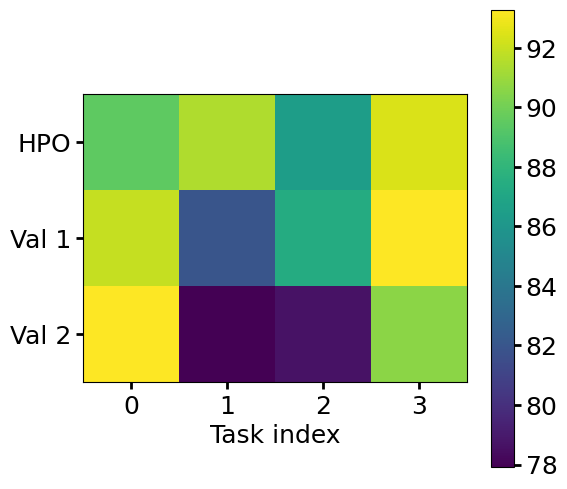

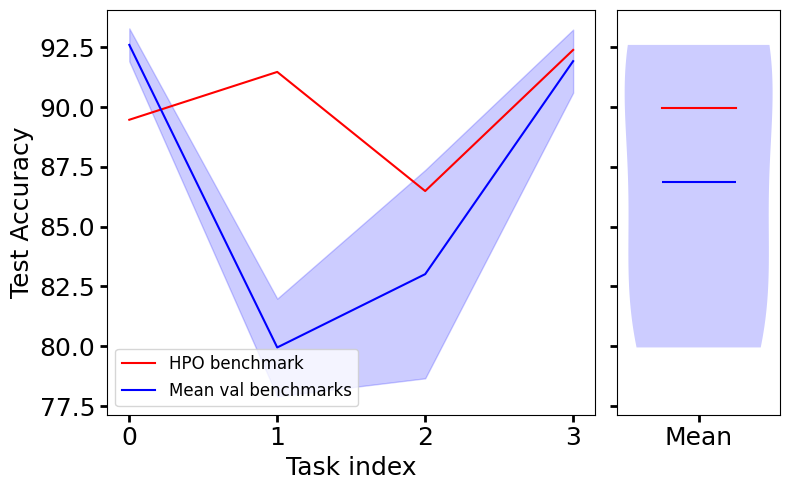

In [11]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [12]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)